## Zeeman Effect

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import pandas as pd
import scipy.stats
import scipy.optimize
from scipy.optimize import curve_fit

In [2]:
current = np.array([4,6,8,10,12,10,8,6,4])
current_fehler = np.array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3])
vertical = [np.mean(np.array([0.010,0.009,0.008])),np.mean(np.array([0.019,0.014,0.014])),np.mean(np.array([0.032,0.041,0.036])),
            np.mean(np.array([0.039,0.046,0.047])), np.mean(np.array([0.046,0.048,0.060])),np.mean(np.array([0.035,0.037,0.044])),
            np.mean(np.array([0.030,0.036,0.031])), np.mean(np.array([0.031,0.036,0.028])),np.mean(np.array([0.020,0.018,0.019]))]

vertical_fehler = np.array([np.std(np.array([0.010,0.009,0.008])),np.std(np.array([0.019,0.014,0.014])),np.std(np.array([0.032,0.041,0.036])),np.std(np.array([0.039,0.046,0.047])),
                     np.std(np.array([0.046,0.048,0.060])),np.std(np.array([0.035,0.037,0.044])),np.std(np.array([0.030,0.036,0.031])),
                     np.std(np.array([0.031,0.036,0.028])),np.std(np.array([0.020,0.018,0.019]))])

parallel = np.array([np.mean(np.array([0.210,0.212,0.211])),np.mean(np.array([0.320,0.311,0.317])),np.mean(np.array([0.406,0.410,0.402])),np.mean(np.array([0.508,0.504,0.510])),
                     np.mean(np.array([0.604,0.590,0.600])),np.mean(np.array([0.511,0.513,0.510])),np.mean(np.array([0.405,0.410,0.412])),
                     np.mean(np.array([0.313,0.318,0.320])),np.mean(np.array([0.217,0.220,0.216]))])

parallel_fehler = np.array([np.std(np.array([0.210,0.212,0.211])),np.std(np.array([0.320,0.311,0.317])),np.std(np.array([0.406,0.410,0.402])),np.std(np.array([0.508,0.504,0.510])),
                     np.std(np.array([0.604,0.590,0.600])),np.std(np.array([0.511,0.513,0.510])),np.std(np.array([0.405,0.410,0.412])),
                     np.std(np.array([0.313,0.318,0.320])),np.std(np.array([0.217,0.220,0.216]))])


### Vertical measurement 

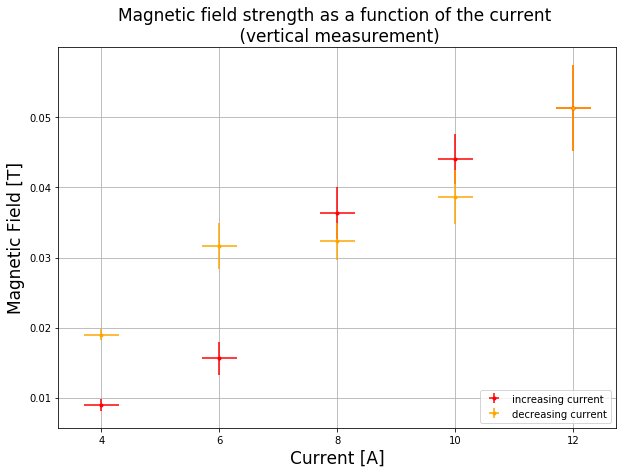

In [3]:
plt.figure(figsize=(10,7))
plt.errorbar(current[:5], vertical[:5], yerr=vertical_fehler[:5], xerr=current_fehler[:5], fmt='.', label = 'increasing current', color = 'red')
plt.errorbar(current[4:], vertical[4:], yerr=vertical_fehler[4:], xerr=current_fehler[4:], fmt='.', label = 'decreasing current', color = 'orange')
plt.grid()
plt.xlabel('Current [A]', fontsize = 17)
plt.ylabel('Magnetic Field [T]', fontsize = 17)
plt.legend(loc = 4)
plt.title('Magnetic field strength as a function of the current \n (vertical measurement)', fontsize = 17)
#plt.savefig("./parallel.png")
plt.show()

### Parallel measurement

a = 0.048266666722424634 +- 4.725925338857633e-07
b = 0.021533332823647344 +- 3.4026665131736935e-05


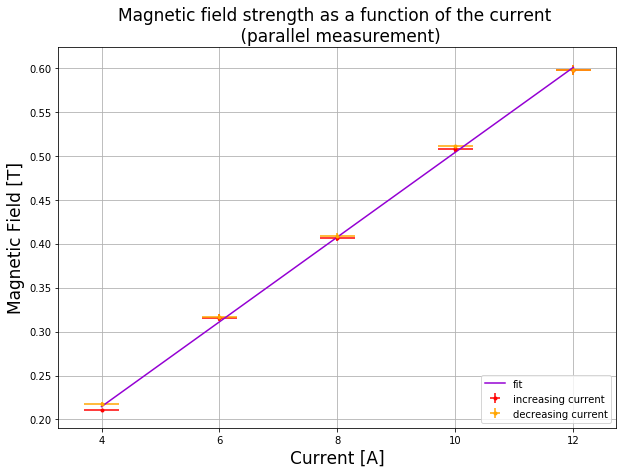

In [4]:
plt.figure(figsize=(10,7))

def fit_func(x, a, b):
    return a*x + b

popt, pcov = curve_fit(fit_func, current[:5], parallel[:5], p0 = [1, 1], sigma = current_fehler[:5])

plt.plot(current[:5], fit_func(current[:5], *popt), color = 'darkviolet', label = 'fit')


plt.errorbar(current[:5], parallel[:5], yerr=parallel_fehler[:5], xerr=current_fehler[:5], fmt='.', label = 'increasing current', color = 'red')
plt.errorbar(current[4:], parallel[4:], yerr=parallel_fehler[4:], xerr=current_fehler[4:], fmt='.', label = 'decreasing current', color = 'orange')
plt.grid()
plt.xlabel('Current [A]', fontsize = 17)
plt.ylabel('Magnetic Field [T]', fontsize = 17)
plt.legend(loc = 4)
plt.title('Magnetic field strength as a function of the current \n (parallel measurement)', fontsize = 17)
#plt.savefig("./vertical.png")

print("a = {} +- {}".format(popt[0], pcov[0,0]))
print("b = {} +- {}".format(popt[1], pcov[1,1]))

plt.show()

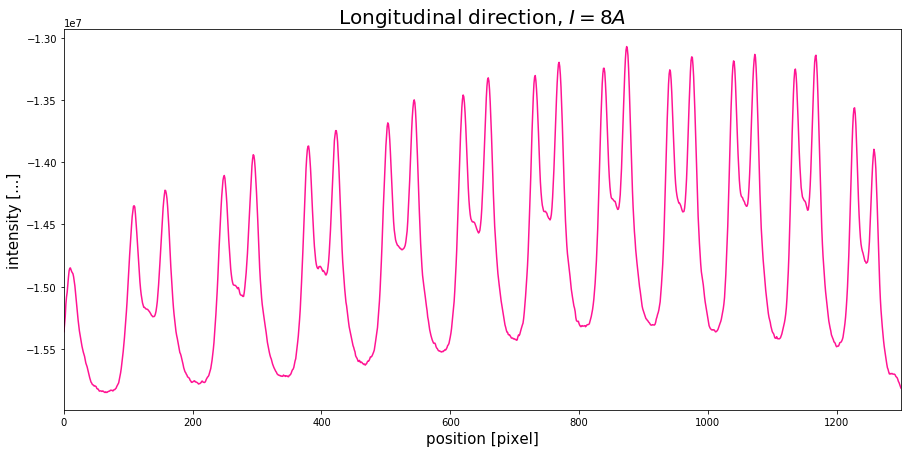

In [5]:
pos, intensity = np.loadtxt("./long_nofilter_8A.xls", skiprows = 1, usecols = (0,1), unpack = True)

plt.figure(figsize=(15,7))
plt.plot(pos, intensity, color = 'deeppink')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Longitudinal direction, $I = 8A$", size = 20)
plt.xlim(0,1300)
plt.show()

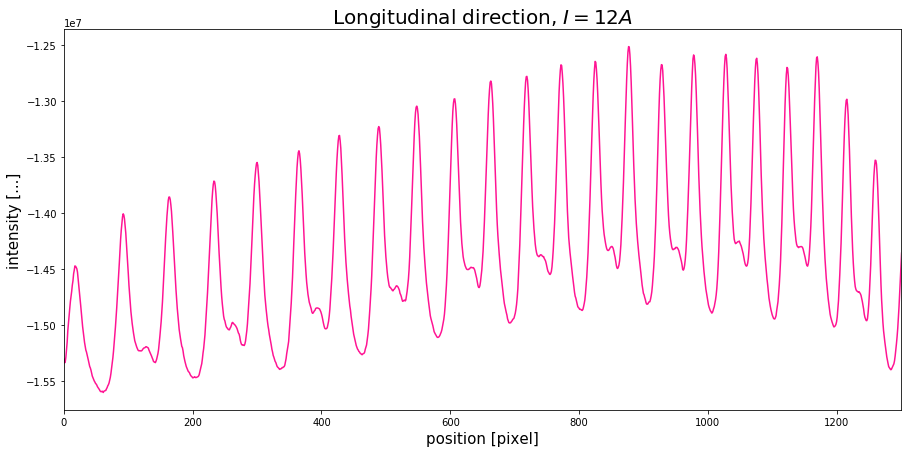

In [6]:
pos, intensity = np.loadtxt("./long_nofilter_12A.xls", skiprows = 1, usecols = (0,1), unpack = True)

plt.figure(figsize=(15,7))
plt.plot(pos, intensity, color = 'deeppink')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Longitudinal direction, $I = 12A$", size = 20)
plt.xlim(0,1300)
plt.show()

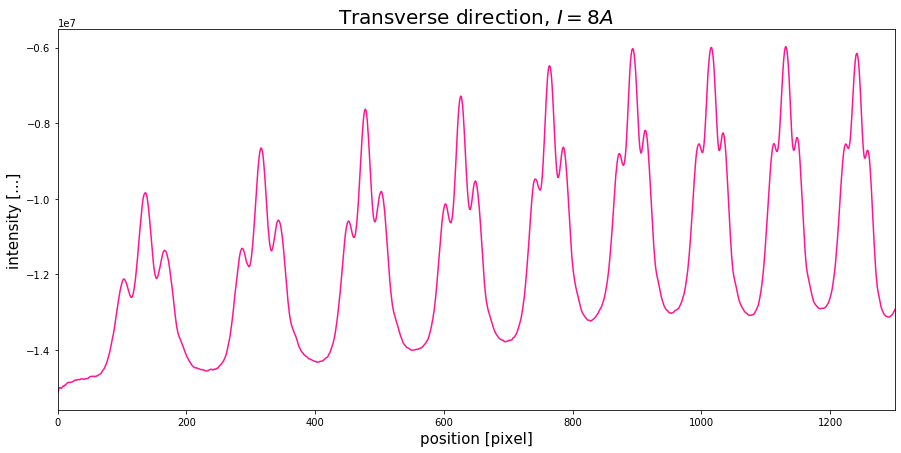

In [7]:
pos, intensity = np.loadtxt("./transverse_nofilter_8A.xls", skiprows = 1, usecols = (0,1), unpack = True)

plt.figure(figsize=(15,7))
plt.plot(pos, intensity, color = 'deeppink')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Transverse direction, $I = 8A$", size = 20)
plt.xlim(0,1300)

plt.show()

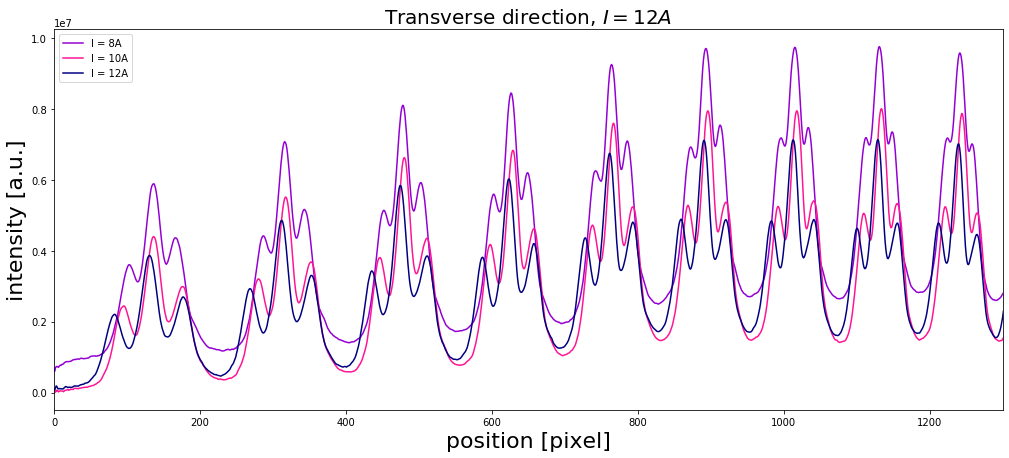

In [8]:
pos3, intensity3 = np.loadtxt("./transverse_nofilter_12A.xls", skiprows = 1, usecols = (0,1), unpack = True)
pos2, intensity2 = np.loadtxt("./transverse_nofilter_10A.xls", skiprows = 1, usecols = (0,1), unpack = True)
pos1, intensity1 = np.loadtxt("./transverse_nofilter_8A.xls", skiprows = 1, usecols = (0,1), unpack = True)

offset = intensity2[1]

intensity1 = intensity1 - offset
intensity2 = intensity2 - offset
intensity3 = intensity3 - offset

plt.figure(figsize=(17,7))
plt.plot(pos1, intensity1, label = 'I = 8A', color = 'darkviolet')
plt.plot(pos2, intensity2, label = 'I = 10A', color = 'deeppink')
plt.plot(pos3, intensity3, label = 'I = 12A', color = 'navy')
plt.xlabel("position [pixel]", size = 22)
plt.ylabel("intensity [a.u.]", size = 22)
plt.title("Transverse direction, $I = 12A$", size = 20)
plt.xlim(0,1300)
plt.legend(loc = 'best')
#plt.savefig("transversecurrents.png")
plt.show()

## Gauss-Teil

**Current 8A**

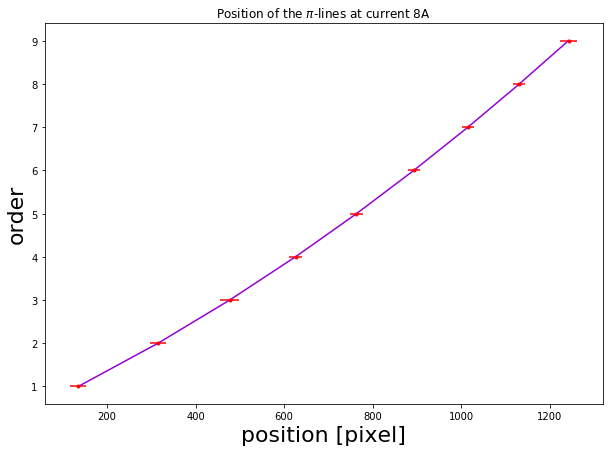

a = 1.806328798759262e-06 +- 4.725178908943993e-17
b = 0.004740463292544696 +- 9.701572159406847e-11
c = 0.32691017833084757 +- 1.017450235955127e-05


In [9]:
plt.figure(figsize=(10,7))

order = np.array([9, 8, 7, 6, 5, 4, 3, 2, 1])
positions = np.array([1242.2290973, 1130.79595172, 1015.24361825, 893.018299787, 763.358964468, 625.866651929, 477.09427275, 315.210819868, 134.915904699])
#error as 2 sigma
positions_error = 2 * np.array([9.76805745494, 6.6859936284, 6.86536620516, 6.89762055759, 6.93085844631, 7.42037577674, 10.6339606313, 8.5925337414, 9.2944339645])

def fit_func(x, a, b, c):
    return a*x**2 + b*x + c

popt, pcov = curve_fit(fit_func, positions, order, p0 = [-1, 1, 1], sigma = positions_error)

plt.errorbar(positions, order, xerr=positions_error, fmt='.', label = 'Current 8A', color = 'red')
plt.plot(positions, fit_func(positions, *popt), color = 'darkviolet')
plt.title("Position of the $\pi$-lines at current 8A")
plt.xlabel("position [pixel]", size = 22)
plt.ylabel("order", size = 22)
#plt.savefig("8Afit.png")
plt.show()


print("a = {} +- {}".format(popt[0], pcov[0,0]))
print("b = {} +- {}".format(popt[1], pcov[1,1]))
print("c = {} +- {}".format(popt[2], pcov[2,2]))

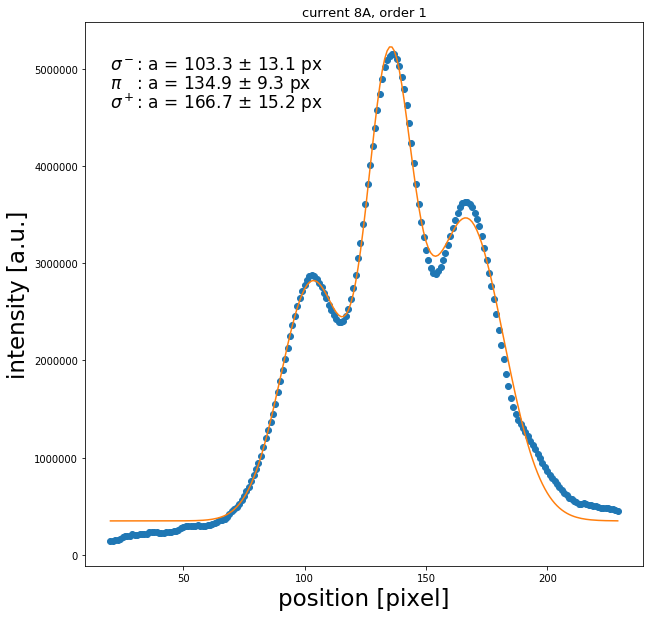

left 103.2811445829061 +/- 13.120160839220887
middle 134.91592537336967 +/- 9.294430041796446
right 166.7444030371099 +/- 15.233708042619073


In [10]:
x1, y1 = np.loadtxt("./transverse_nofilter_8A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[20:230]
y1 = y1[20:230] + 1.5e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [100, 140, 170, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 8A, order 1", size = 13)
plt.xlabel("position [pixel]", size = 23)
plt.ylabel("intensity [a.u.]", size = 23)

plt.text(20,5000000, "$\sigma^-$: a = {0} $\pm$ {1} px".format(round(fitted_params[0], 1), round(fitted_params[3], 1)), size = 17)
plt.text(20,4800000, "$\pi$   : a = {0} $\pm$ {1} px".format(round(fitted_params[1], 1), round(fitted_params[4], 1)), size = 17)
plt.text(20,4600000, "$\sigma^+$: a = {0} $\pm$ {1} px".format(round(fitted_params[2], 1), round(fitted_params[5], 1)), size = 17)
#plt.savefig("current8Aorder1.png")
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

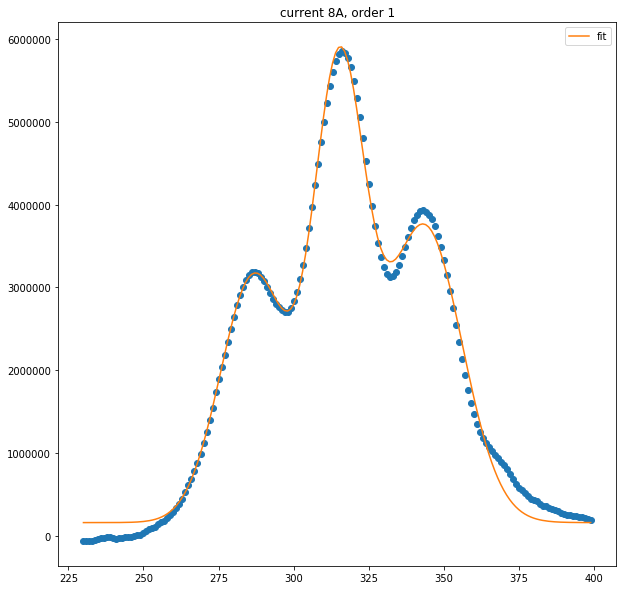

left 286.89477857946497 +/- 11.214704548739226
middle 315.2107915731911 +/- 8.59250797139601
right 343.5186633923177 +/- 12.598307041863151


In [11]:
x1, y1 = np.loadtxt("./transverse_nofilter_8A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[230:400]
y1 = y1[230:400] + 1.45e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [280, 320, 340, 10, 10, 10, 1e+2, 1e+2, 1e+2, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 8A, order 1")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

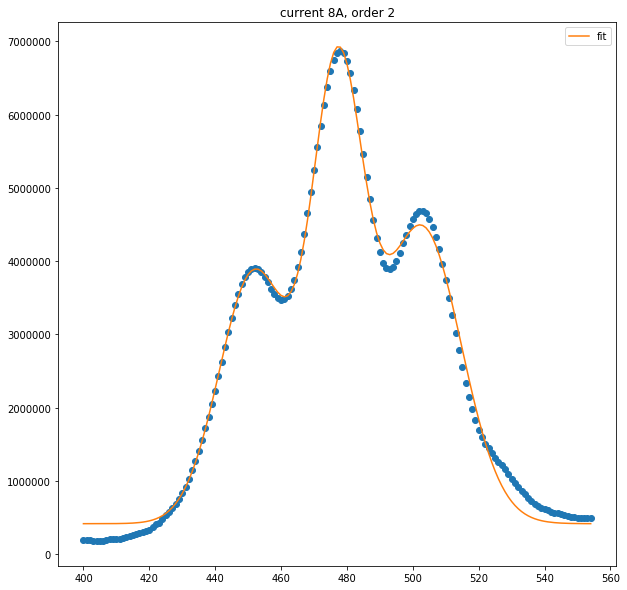

left 451.89606157623837 +/- 10.633969245939257
middle 477.094272573248 +/- 7.804605761283514
right 502.6431349854189 +/- 12.010056976159802


In [12]:
x1, y1 = np.loadtxt("./transverse_nofilter_8A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[400:555]
y1 = y1[400:555] + 1.45e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [430, 450, 510, 8, 8, 8, 1e+3, 1, 1, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 8A, order 2")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

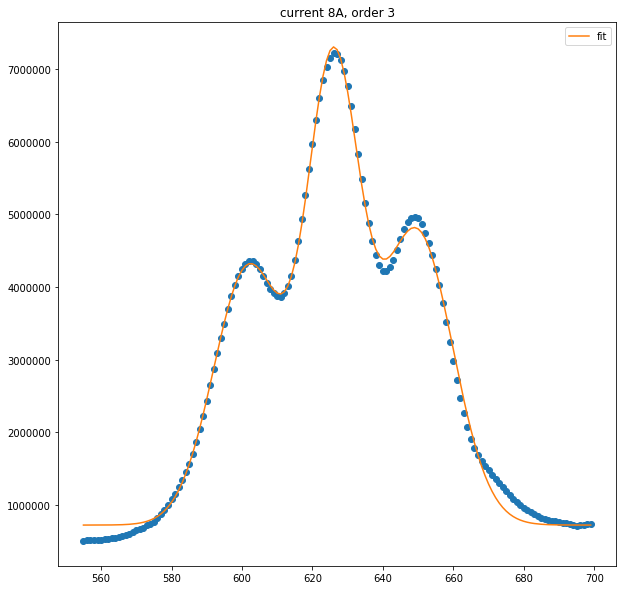

left 601.9638711388604 +/- 9.9549845869575
middle 625.8666528724505 +/- 7.420375704383602
right 649.4610554827276 +/- 10.347772892511658


In [13]:
x1, y1 = np.loadtxt("./transverse_nofilter_8A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[555:700]
y1 = y1[555:700] + 1.45e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [610, 630, 650, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 8A, order 3")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

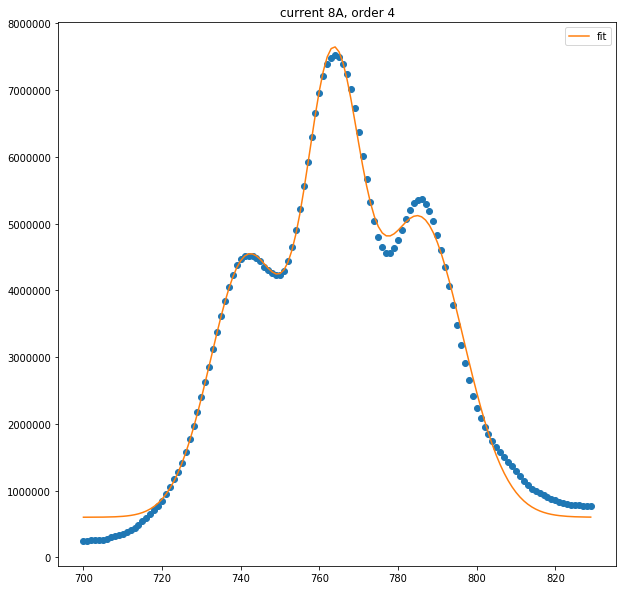

left 741.7800829769059 +/- 9.443645333394562
middle 763.3589948480493 +/- 6.9308950162948815
right 785.485228055783 +/- 10.995001665232245


In [14]:
x1, y1 = np.loadtxt("./transverse_nofilter_8A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[700:830]
y1 = y1[700:830] + 1.4e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [740, 770, 790, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 8A, order 4")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

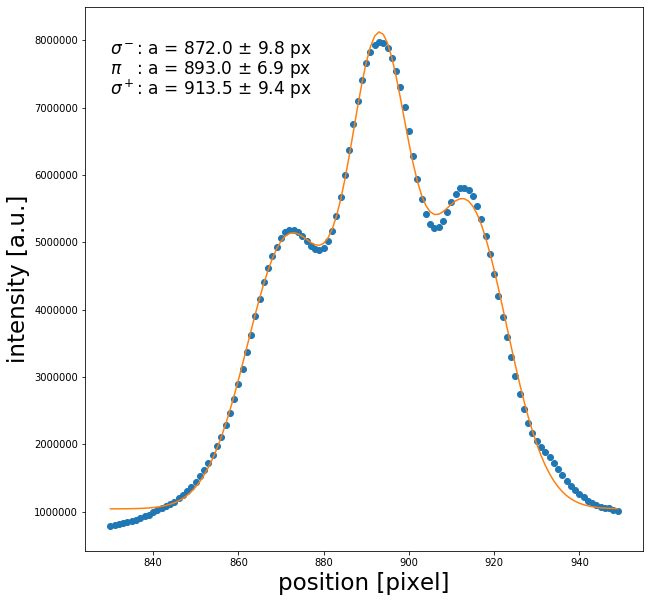

left 871.9720156694233 +/- 9.798375973342534
middle 893.0182986518641 +/- 6.89761635773492
right 913.4632314287392 +/- 9.40810091584707


In [15]:
x1, y1 = np.loadtxt("./transverse_nofilter_8A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[830:950]
y1 = y1[830:950] + 1.4e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [875, 895, 915, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.text(830,7800000, "$\sigma^-$: a = {0} $\pm$ {1} px".format(round(fitted_params[0], 1), round(fitted_params[3], 1)), size = 17)
plt.text(830,7500000, "$\pi$   : a = {0} $\pm$ {1} px".format(round(fitted_params[1], 1), round(fitted_params[4], 1)), size = 17)
plt.text(830,7200000, "$\sigma^+$: a = {0} $\pm$ {1} px".format(round(fitted_params[2], 1), round(fitted_params[5], 1)), size = 17)
plt.xlabel("position [pixel]", size = 23)
plt.ylabel("intensity [a.u.]", size = 23)
#plt.savefig("current8Aorder6.png")
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

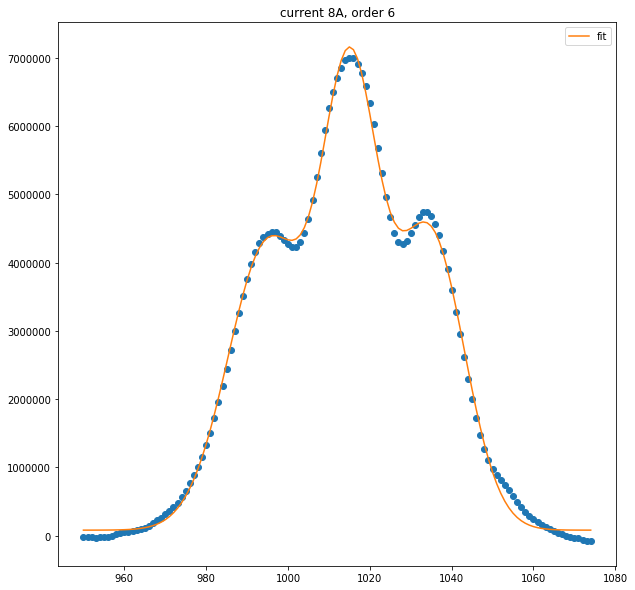

left 995.1756021423435 +/- 9.77562443414068
middle 1015.2436164247727 +/- 6.865364856033479
right 1034.516447322825 +/- 8.560781776102651


In [16]:
x1, y1 = np.loadtxt("./transverse_nofilter_8A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[950:1075]
y1 = y1[950:1075] + 1.3e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [990, 1015, 1040, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 8A, order 6")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

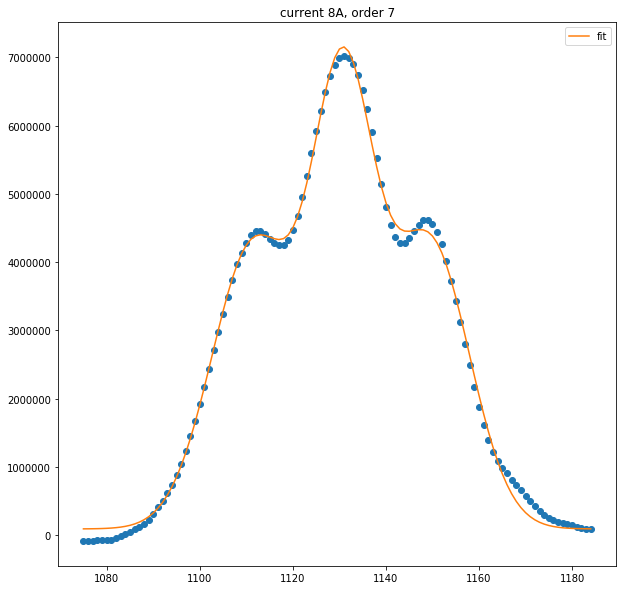

left 1111.630027680048 +/- 9.007647797341747
middle 1130.7959373945844 +/- 6.685967888169106
right 1149.3277627143996 +/- 8.629552837949998


In [17]:
x1, y1 = np.loadtxt("./transverse_nofilter_8A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[1075:1185]
y1 = y1[1075:1185] + 1.3e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [1110, 1130, 1155, 10, 10, 10, 1e+3, 1e+2, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 8A, order 7")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

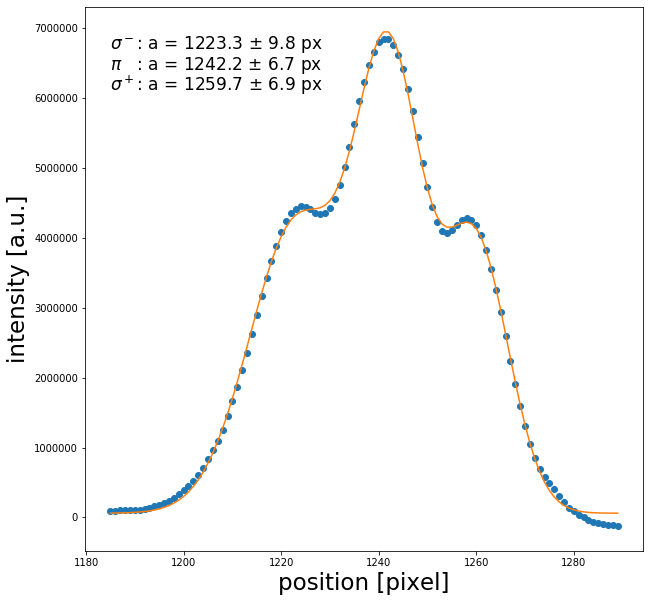

left 1223.3301816061542 +/- 9.768062524357427
middle 1242.2290973720983 +/- 6.7388423002217515
right 1259.727160259353 +/- 6.851524718105543


In [18]:
x1, y1 = np.loadtxt("./transverse_nofilter_8A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[1185:1290]
y1 = y1[1185:1290] + 1.3e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [1210, 1240, 1265, 10, 10, 10, 1e+3, 1e+2, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.text(1185,6700000, "$\sigma^-$: a = {0} $\pm$ {1} px".format(round(fitted_params[0], 1), round(fitted_params[3], 1)), size = 17)
plt.text(1185,6400000, "$\pi$   : a = {0} $\pm$ {1} px".format(round(fitted_params[1], 1), round(fitted_params[4], 1)), size = 17)
plt.text(1185,6100000, "$\sigma^+$: a = {0} $\pm$ {1} px".format(round(fitted_params[2], 1), round(fitted_params[5], 1)), size = 17)
plt.xlabel("position [pixel]", size = 23)
plt.ylabel("intensity [a.u.]", size = 23)
#plt.savefig("current8Aorder9.png")
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

**Current 10A**

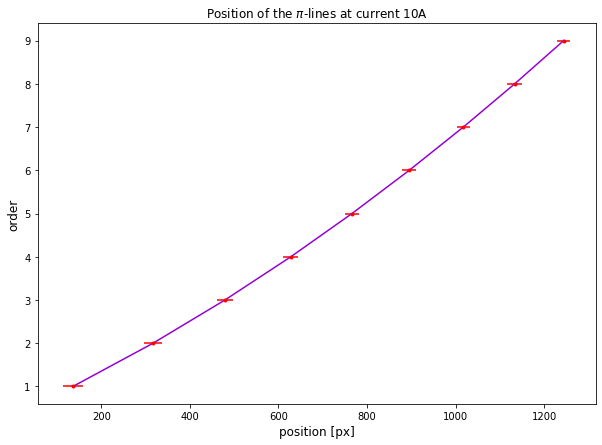

a = 1.8211772917480033e-06 +- 6.245883684478145e-18
b = 0.004702567443761335 +- 1.4217853617421912e-11
c = 0.3286803785889984 +- 1.6441120431205601e-06


In [19]:
plt.figure(figsize=(10,7))

order = np.array([9, 8, 7, 6, 5, 4, 3, 2, 1])
positions = np.array([1244.32087556, 1133.59570863, 1017.62381941, 895.614749129, 765.8919585, 628.007051747, 479.152155073, 316.661839685, 135.586337753])
#error as 2 sigma
positions_error = 2 * np.array([7.33456498363, 8.17826117085, 7.72738799085, 7.98931755351, 8.08075335694, 8.54545200073, 9.14893593413, 10.0171371444, 11.1517496584])

def fit_func(x, a, b, c):
    return a*x**2 + b*x + c

popt, pcov = curve_fit(fit_func, positions, order, p0 = [-1, 1, 1], sigma = positions_error)

plt.errorbar(positions, order, xerr=positions_error, fmt='.', label = 'Current 8A', color = 'red')
plt.plot(positions, fit_func(positions, *popt), color = 'darkviolet')
plt.title("Position of the $\pi$-lines at current 10A")
plt.xlabel("position [px]", size = 12)
plt.ylabel("order", size = 12)
#plt.savefig("10Afit.png")
plt.show()

print("a = {} +- {}".format(popt[0], pcov[0,0]))
print("b = {} +- {}".format(popt[1], pcov[1,1]))
print("c = {} +- {}".format(popt[2], pcov[2,2]))

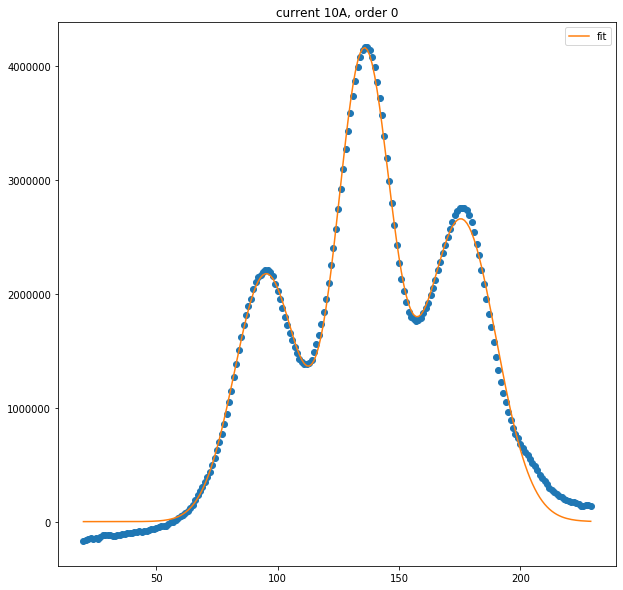

left 95.16350721697721 +/- 12.937081071571326
middle 135.58633971031298 +/- 11.151752484249085
right 175.60434619502158 +/- 14.41417653499022


In [20]:
x1, y1 = np.loadtxt("./transverse_nofilter_10A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[20:230]
y1 = y1[20:230] + 1.55e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [90, 140, 175, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 10A, order 0")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

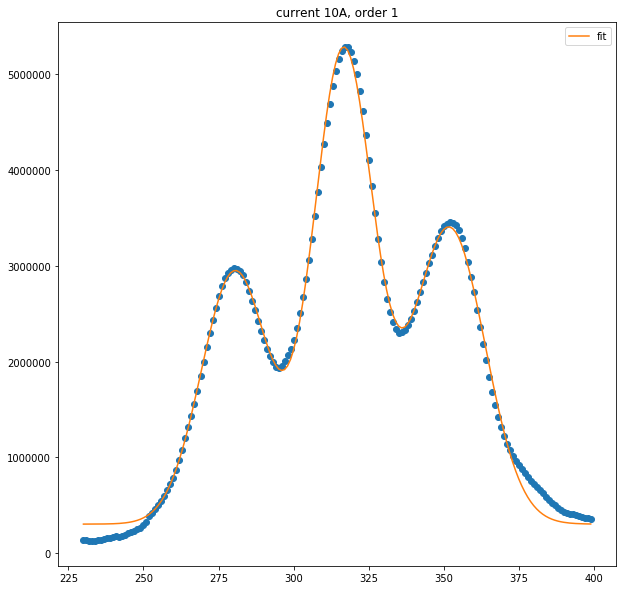

left 280.49589155380215 +/- 11.22107739135793
middle 316.66184089851384 +/- 10.017139329382731
right 351.85308301161524 +/- 11.953627561679513


In [21]:
x1, y1 = np.loadtxt("./transverse_nofilter_10A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[230:400]
y1 = y1[230:400] + 1.55e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [270, 310, 355, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 10A, order 1")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

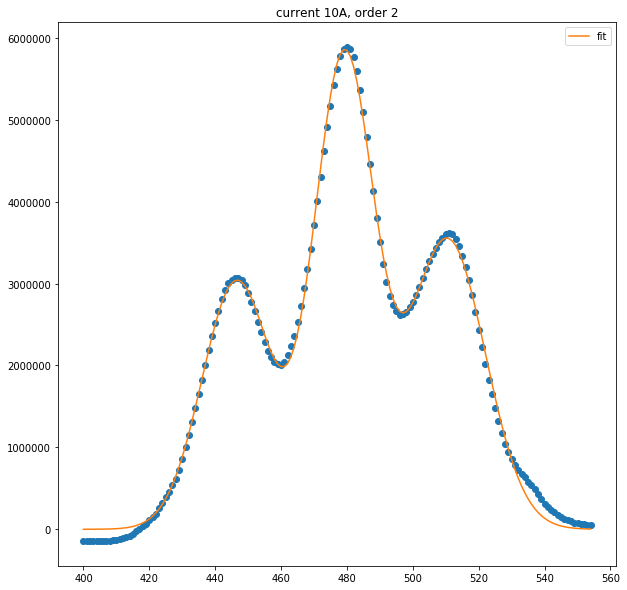

left 446.54880426030013 +/- 10.542269060479294
middle 479.1521549087963 +/- 9.148935735891822
right 510.5043192475307 +/- 11.53927223040094


In [22]:
x1, y1 = np.loadtxt("./transverse_nofilter_10A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[400:555]
y1 = y1[400:555] + 1.5e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [430, 450, 510, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 10A, order 2")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

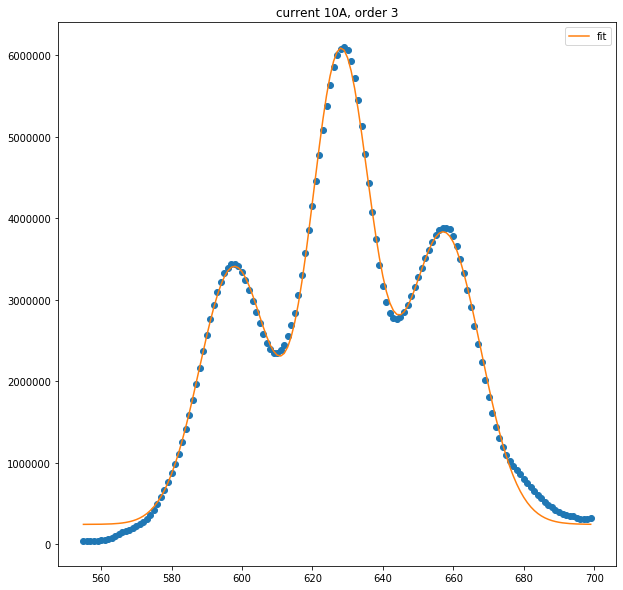

left 597.7495556707242 +/- 9.830725048754596
middle 628.0070580893932 +/- 8.545462522818106
right 657.3073290451097 +/- 10.405633503040175


In [23]:
x1, y1 = np.loadtxt("./transverse_nofilter_10A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[555:700]
y1 = y1[555:700] + 1.5e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [585, 625, 655, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 10A, order 3")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

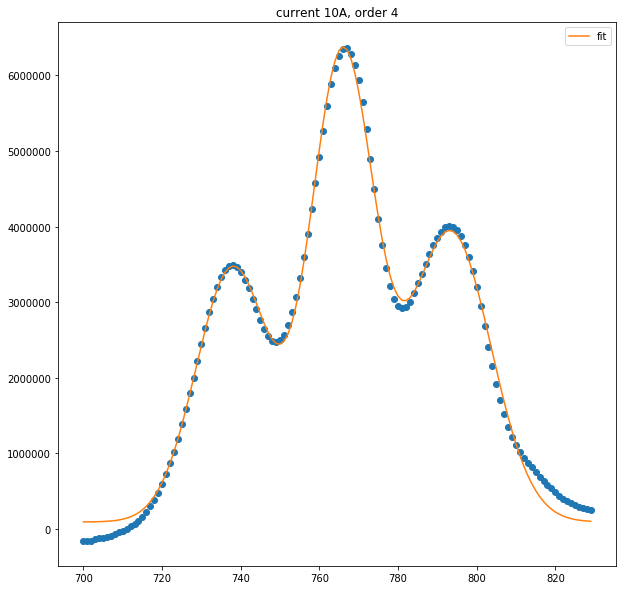

left 737.9696628500078 +/- 9.315437238973525
middle 765.8919578395224 +/- 8.08075206422883
right 793.3458332863726 +/- 10.277192182687283


In [24]:
x1, y1 = np.loadtxt("./transverse_nofilter_10A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[700:830]
y1 = y1[700:830] + 1.45e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [730, 760, 790, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 10A, order 4")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

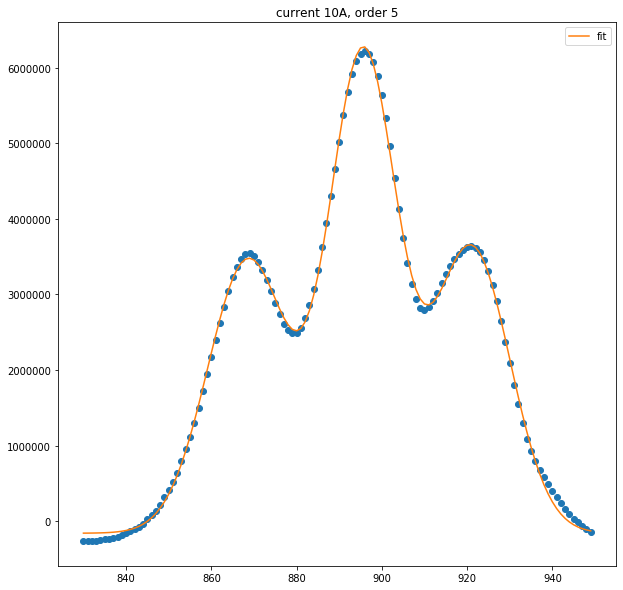

left 868.609296975526 +/- 9.429522275258043
middle 895.6147488687301 +/- 7.989316729930385
right 921.0413757969334 +/- 9.023122680931554


In [25]:
x1, y1 = np.loadtxt("./transverse_nofilter_10A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[830:950]
y1 = y1[830:950] + 1.4e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [860, 890, 920, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 10A, order 5")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

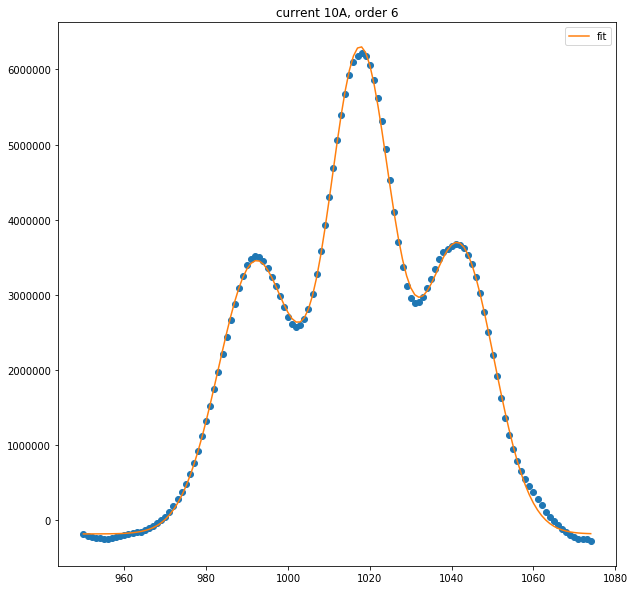

left 992.0741337120736 +/- 9.126519687951836
middle 1041.742339673146 +/- 8.63569422784555
right 1017.6238187282571 +/- 7.727385676687471


In [26]:
x1, y1 = np.loadtxt("./transverse_nofilter_10A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[950:1075]
y1 = y1[950:1075] + 1.4e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [990, 1020, 1040, 8, 8, 8, 1e+3, 1e+2, 1e+2, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 10A, order 6")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

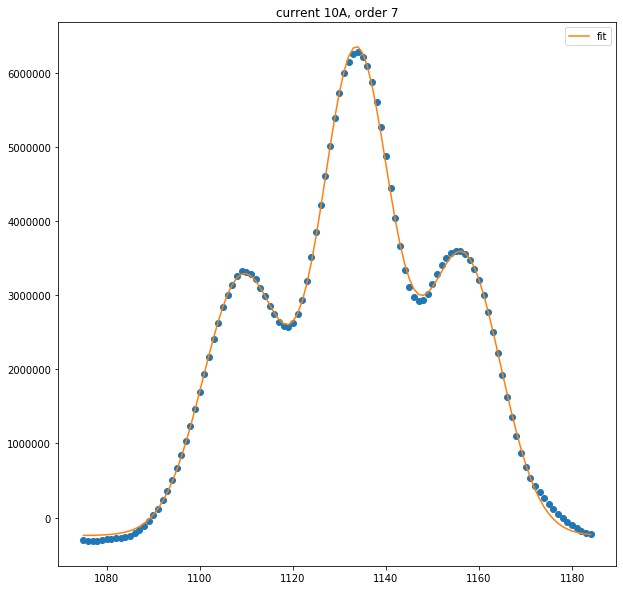

left 1109.2897593285131 +/- 8.585669821071495
middle 1133.5957067985037 +/- 7.5569509366570085
right 1156.5160250583506 +/- 8.178271624921493


In [27]:
x1, y1 = np.loadtxt("./transverse_nofilter_10A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[1075:1185]
y1 = y1[1075:1185] + 1.4e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [1115, 1130, 1155, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 10A, order 7")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

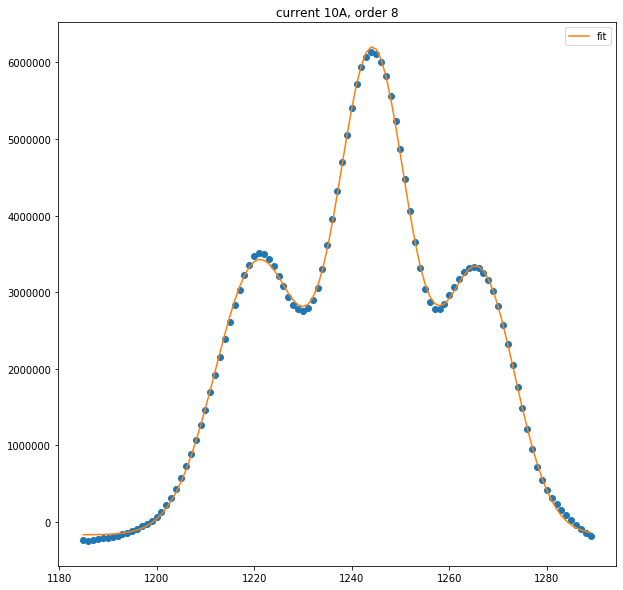

left 1220.8340349326888 +/- 8.741121790868212
middle 1244.3208755689955 +/- 7.334564962518365
right 1266.0562541175073 +/- 7.405396552226413


In [28]:
x1, y1 = np.loadtxt("./transverse_nofilter_10A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[1185:1290]
y1 = y1[1185:1290] + 1.4e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [1220, 1245, 1270, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 10A, order 8")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

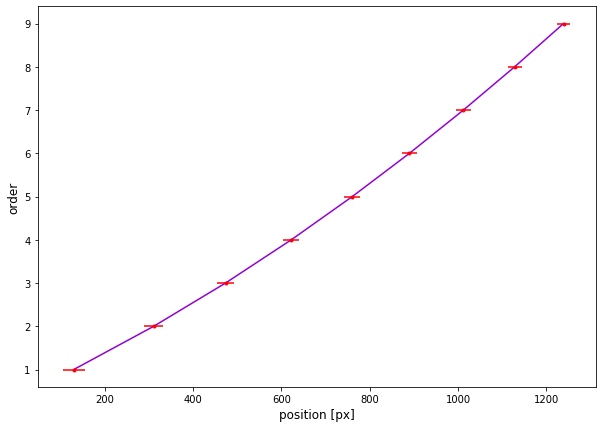

a = 1.8226057851824772e-06 +- 3.3555359493207568e-18
b = 0.004720017734211088 +- 7.65119471665341e-12
c = 0.35436801850271743 +- 8.855164114594964e-07


In [29]:
plt.figure(figsize=(10,7))

order = np.array([9, 8, 7, 6, 5, 4, 3, 2, 1])
positions = np.array([1238.92021769, 1128.32233518, 1012.28179009, 890.221608823, 760.635491169, 622.646880965, 473.90190679, 311.196277311, 130.262790628])
#error as 2 sigma
positions_error = 2 * np.array([7.58984153672, 8.05501700223, 8.1753268156, 8.5769399428, 8.77262116977, 9.21923545082, 9.9938099731, 10.8079643484, 12.3053037552])

def fit_func(x, a, b, c):
    return a*x**2 + b*x + c

popt, pcov = curve_fit(fit_func, positions, order, p0 = [-1, 1, 1], sigma = positions_error)

plt.errorbar(positions, order, xerr=positions_error, fmt='.', label = 'Current 8A', color = 'red')
plt.plot(positions, fit_func(positions, *popt), color = 'darkviolet')
#plt.title("Position of the $\pi$-lines at current 12A")
plt.xlabel("position [px]", size = 12)
plt.ylabel("order", size = 12)
#plt.savefig("12Afit.png")
plt.show()

print("a = {} +- {}".format(popt[0], pcov[0,0]))
print("b = {} +- {}".format(popt[1], pcov[1,1]))
print("c = {} +- {}".format(popt[2], pcov[2,2]))

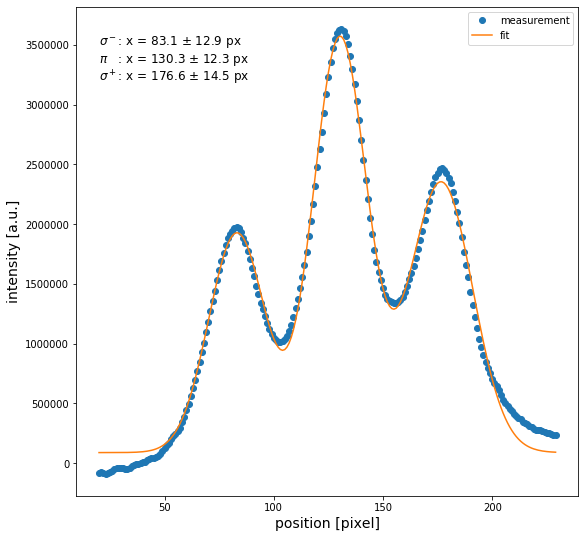

left 83.12154436679054 +/- 12.93941490916518
middle 130.26280007044593 +/- 12.305319454531132
right 176.6249740504008 +/- 14.459543591583959


In [30]:
x1, y1 = np.loadtxt("./transverse_nofilter_12A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[20:230]
y1 = y1[20:230] + 1.55e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(9,9))
params = [80, 140, 180, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o', label = "measurement")
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
#plt.title("current 12A, order 0")
plt.legend(loc = 'best')
plt.xlabel("position [pixel]", size = 14)
plt.ylabel("intensity [a.u.]", size = 14)
#plt.savefig("current12AGaussians.png")
plt.text(20,3500000, "$\sigma^-$: x = {0} $\pm$ {1} px".format(round(fitted_params[0], 1), round(fitted_params[3], 1)), size = 12)
plt.text(20,3350000, "$\pi$   : x = {0} $\pm$ {1} px".format(round(fitted_params[1], 1), round(fitted_params[4], 1)), size = 12)
plt.text(20,3200000, "$\sigma^+$: x = {0} $\pm$ {1} px".format(round(fitted_params[2], 1), round(fitted_params[5], 1)), size = 12)
#plt.savefig("12Aorder0.png")
plt.show()
print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

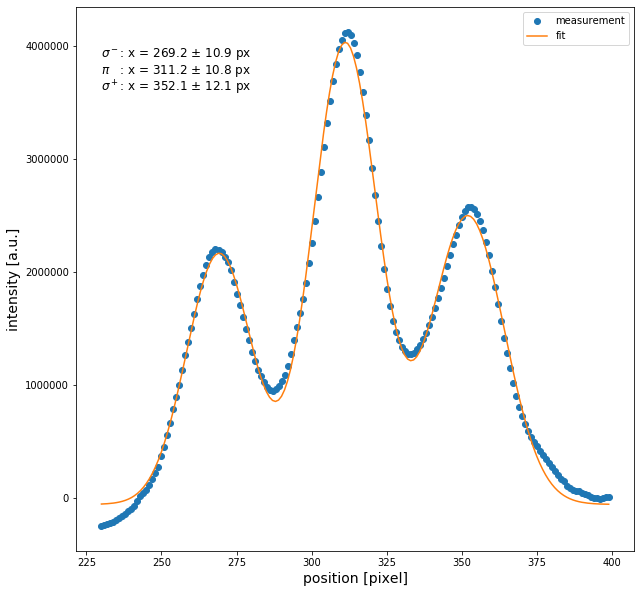

left 269.23354000824537 +/- 10.89141010323358
middle 311.1962778470978 +/- 10.807968572975291
right 352.0935370559319 +/- 12.121102520378704


In [31]:
x1, y1 = np.loadtxt("./transverse_nofilter_12A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[230:400]
y1 = y1[230:400] + 1.5e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [270, 310, 355, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o', label = "measurement")
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
#plt.title("current 12A, order 1")
plt.text(230,3900000, "$\sigma^-$: x = {0} $\pm$ {1} px".format(round(fitted_params[0], 1), round(fitted_params[3], 1)), size = 12)
plt.text(230,3750000, "$\pi$   : x = {0} $\pm$ {1} px".format(round(fitted_params[1], 1), round(fitted_params[4], 1)), size = 12)
plt.text(230,3600000, "$\sigma^+$: x = {0} $\pm$ {1} px".format(round(fitted_params[2], 1), round(fitted_params[5], 1)), size = 12)
plt.legend(loc = 'best')
plt.xlabel("position [pixel]", size = 14)
plt.ylabel("intensity [a.u.]", size = 14)
#plt.savefig('12Aorder1.png')

plt.show()


print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

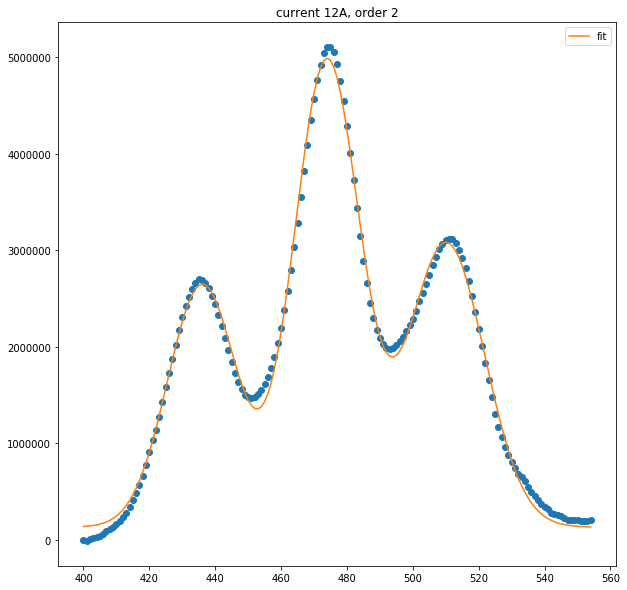

left 436.0672535419172 +/- 10.481087442247185
middle 473.9019073230945 +/- 9.993807131822914
right 510.17229769034407 +/- 11.64119997630067


In [32]:
x1, y1 = np.loadtxt("./transverse_nofilter_12A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[400:555]
y1 = y1[400:555] + 1.5e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [430, 450, 510, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 12A, order 2")
plt.legend(loc = 'best')
plt.show()
print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

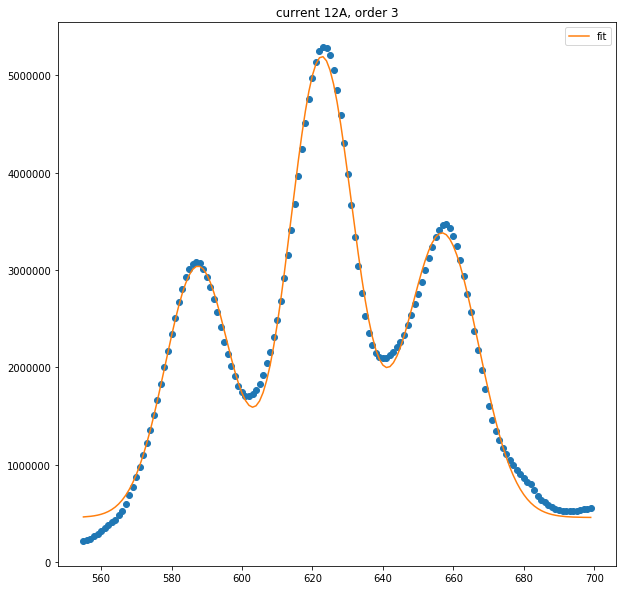

left 587.5030177048544 +/- 9.309703956525277
middle 622.6468810276293 +/- 9.219235458059556
right 656.8807164295232 +/- 10.301248364988435


In [33]:
x1, y1 = np.loadtxt("./transverse_nofilter_12A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[555:700]
y1 = y1[555:700] + 1.5e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [585, 625, 655, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 12A, order 3")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

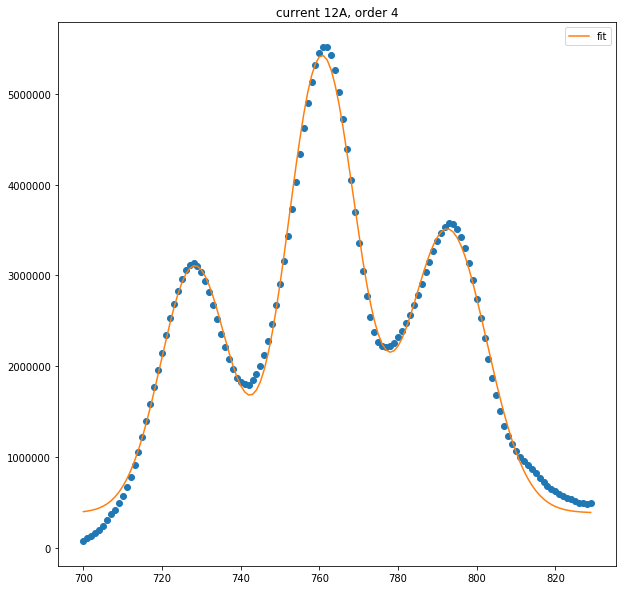

left 728.2812279551912 +/- 8.647710982792635
middle 760.6354915357622 +/- 8.772630946099786
right 792.5929369017022 +/- 9.93391509395288


In [34]:
x1, y1 = np.loadtxt("./transverse_nofilter_12A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[700:830]
y1 = y1[700:830] + 1.45e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [730, 760, 790, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 12A, order 4")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

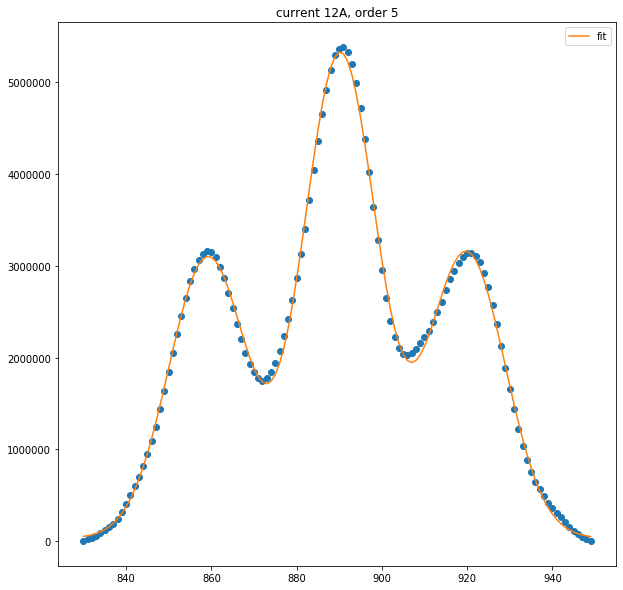

left 859.1856872131247 +/- 9.157051677450632
middle 890.2216107630278 +/- 8.576934095838789
right 919.8660217855003 +/- 9.059758616009416


In [35]:
x1, y1 = np.loadtxt("./transverse_nofilter_12A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[830:950]
y1 = y1[830:950] + 1.4e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [860, 890, 920, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 12A, order 5")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

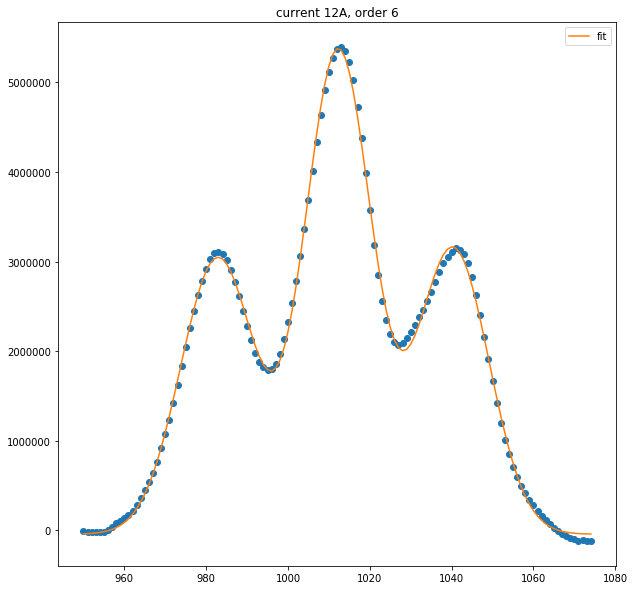

left 982.8402584076052 +/- 9.08723891957193
middle 1012.2817896239413 +/- 8.175328235018442
right 1040.3214668338119 +/- 8.809651037625546


In [36]:
x1, y1 = np.loadtxt("./transverse_nofilter_12A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[950:1075]
y1 = y1[950:1075] + 1.4e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [985, 1015, 1040, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 12A, order 6")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

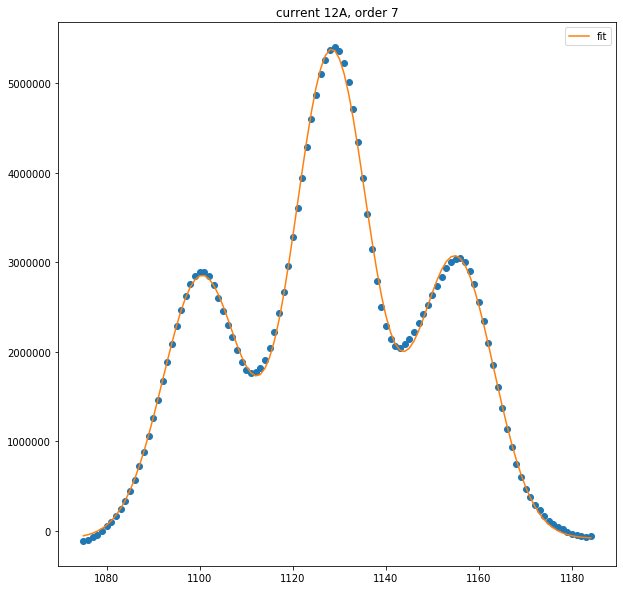

left 1100.403264624254 +/- 8.35807529702621
middle 1128.3223346395002 +/- 8.055018183688118
right 1154.9802172018115 +/- 8.165044349715824


In [37]:
x1, y1 = np.loadtxt("./transverse_nofilter_12A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[1075:1185]
y1 = y1[1075:1185] + 1.4e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [1100, 1130, 1155, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 12A, order 7")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

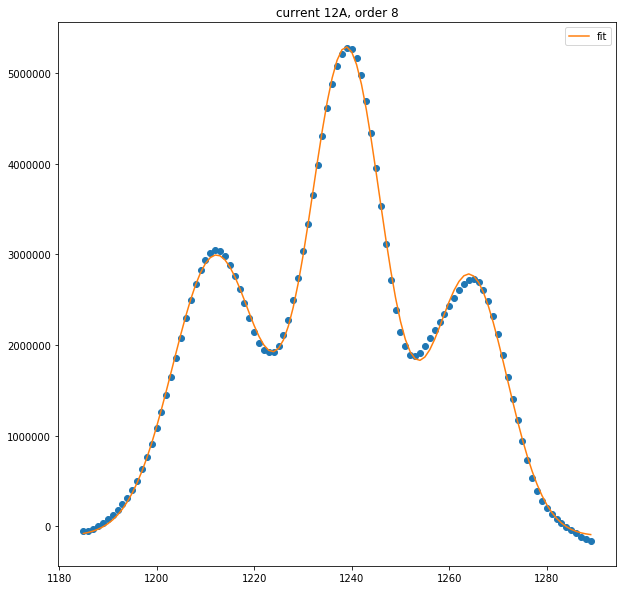

left 1212.138540865391 +/- 8.847756608472299
middle 1238.9202176631097 +/- 7.5898415180631
right 1264.177683677079 +/- 7.686852214529166


In [38]:
x1, y1 = np.loadtxt("./transverse_nofilter_12A.xls", skiprows = 1, usecols = (0,1), unpack = True)
x1 = x1[1185:1290]
y1 = y1[1185:1290] + 1.4e+7
def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3, offset2, offset3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2) + offset2
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3) + offset3
    return ret

plt.figure(figsize=(10,10))
params = [1210, 1240, 1265, 10, 10, 10, 1e+3, 1e+3, 1e+3, 0.5e+6, 0.7e+6]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, x1, y1, p0=params)

plt.plot(x1, y1, 'o')
#popt,pcov = curve_fit(gaus,x1,y1,p0=[1e+10, 2e+15, 0, 10, 5e+15, 50, 10, 2e+15, 10, -5e+10])
#plt.plot(x,gaus(x,*popt) ,label='fit')
plt.plot(x1, tri_norm(x1, *fitted_params), label = 'fit')
plt.title("current 12A, order 8")
plt.legend(loc = 'best')
plt.show()

print("left", fitted_params[0], "+/-", fitted_params[3])
print("middle", fitted_params[1], "+/-", fitted_params[4])
print("right", fitted_params[2], "+/-", fitted_params[5])

a = [9.43221438e-24] +- [[6.5895498e-51]]


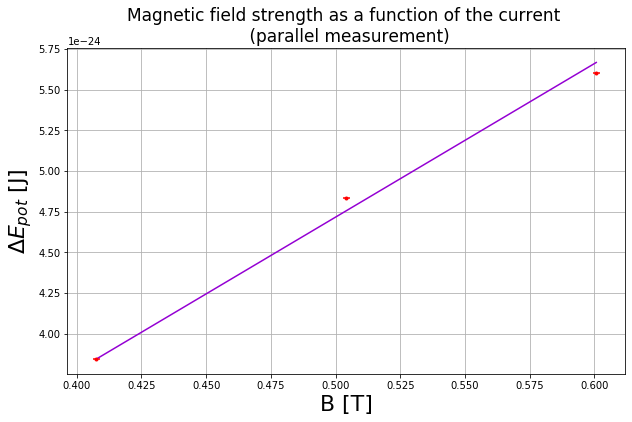

In [39]:
delta_Epot = np.array([3.84596e-24, 4.83319e-24, 5.60071e-24])
delta_Epot_err = np.array([9.73988e-28, 1.224e-27, 1.41837e-27])

B = np.array([0.407666667, 0.5042, 0.600733333])
B_error = np.array([0.001448405, 0.001448407, 0.001448411])

def fit_func(x, a):
    return a*x

popt, pcov = curve_fit(fit_func, B, delta_Epot, p0 = [1], sigma = B_error)

plt.figure(figsize=(10,6))

plt.plot(B, fit_func(B, *popt), color = 'darkviolet', label = 'fit')

plt.errorbar(B, delta_Epot, yerr=delta_Epot_err, xerr = B_error, fmt='.', label = 'data points', color = 'red')
plt.grid()
plt.xlabel('B [T]', fontsize = 22)
plt.ylabel('$\Delta E_{pot}$ [J]', fontsize = 22)
plt.title('Magnetic field strength as a function of the current \n (parallel measurement)', fontsize = 17)
#plt.savefig("./bohrmagneton.png")

print("a = {} +- {}".format(popt, pcov))

plt.show()

## Teil 2

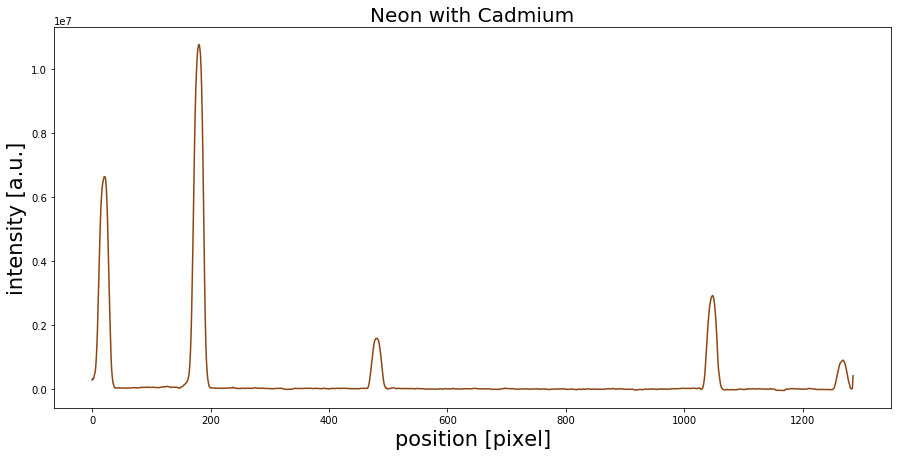

In [40]:
pos, intensity = np.loadtxt("./neonCd.xls", skiprows = 1, usecols = (0,1), unpack = True)
intensity = intensity - intensity[800]

plt.figure(figsize=(15,7))
plt.plot(pos, intensity, color = 'saddlebrown')
plt.xlabel("position [pixel]", size = 21)
plt.ylabel("intensity [a.u.]", size = 21)
plt.title("Neon with Cadmium", size = 20)
#plt.savefig("neoncd.png")
plt.show()

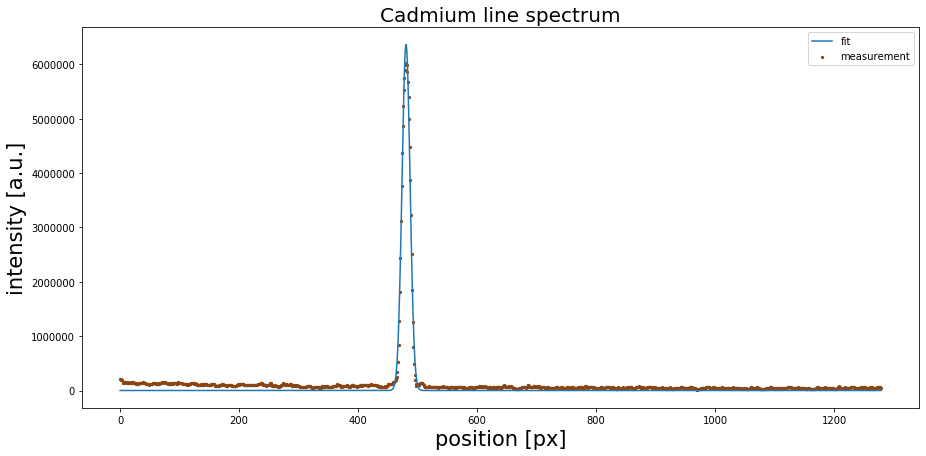

position of the Cd-line 480.58071844593763 +/- 6.773218297159553


In [41]:
pos, intensity = np.loadtxt("./Cadmium.xls", skiprows = 1, usecols = (0,1), unpack = True)
pos = pos[:1280]
intensity = intensity[:1280] + 16696976.000000000

def tri_norm(x, *args):
    m1, s1, k1 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    return ret

params = [450, 3, 1e+3]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, pos, intensity, p0=params)

plt.figure(figsize=(15,7))
plt.scatter(pos, intensity, color = 'saddlebrown', s=5, label = 'measurement')
plt.plot(pos, tri_norm(pos, *fitted_params), label = 'fit')
plt.xlabel("position [px]", size = 21)
plt.ylabel("intensity [a.u.]", size = 21)
plt.title("Cadmium line spectrum", size = 20)
plt.legend(loc = 'best')
#plt.savefig("cd.png")

plt.show()

print("position of the Cd-line", fitted_params[0], "+/-", fitted_params[1])

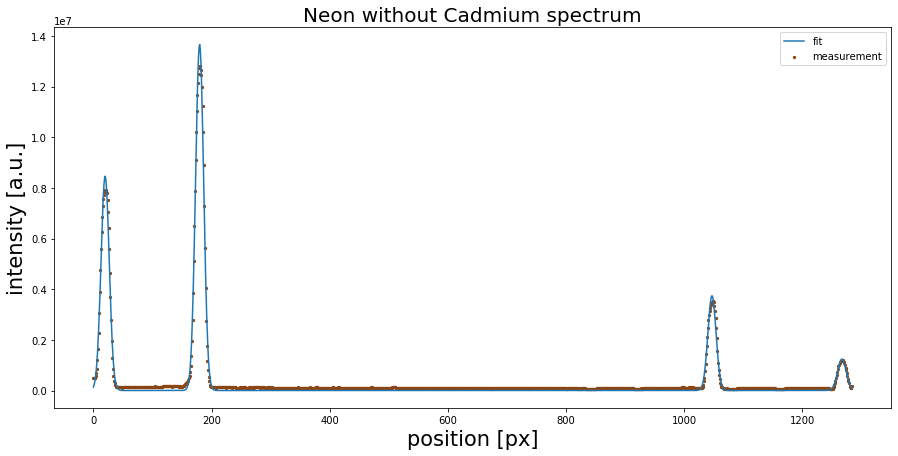

first 19.924757534588707 +/- 6.928746243323352
second 179.79105995177247 +/- 6.8558731370400325
third 1046.9546876586523 +/- 6.920388581131497
fourth 1266.855947254321 +/- 7.239422053130371


In [42]:
pos, intensity = np.loadtxt("./neon_withoutCd.xls", skiprows = 1, usecols = (0,1), unpack = True)
pos = pos[:1285]
intensity = intensity[:1285] + 16696976.000000000

def tri_norm(x, *args):
    m1, m2, m3, m4, s1, s2, s3, s4, k1, k2, k3, k4 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1) 
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2)
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3)
    ret += k4*scipy.stats.norm.pdf(x, loc=m4 ,scale=s4)
    return ret

params = [18, 180, 1040, 1270, 3, 3, 3, 3, 1e+3, 1e+3, 1e+3, 1e+3]


fitted_params,_ = scipy.optimize.curve_fit(tri_norm, pos, intensity, p0=params)


plt.figure(figsize=(15,7))
plt.plot(pos, tri_norm(pos, *fitted_params), label = 'fit')
plt.scatter(pos, intensity, color = 'saddlebrown', s=5, label = 'measurement')
plt.xlabel("position [px]", size = 21)
plt.ylabel("intensity [a.u.]", size = 21)
plt.title("Neon without Cadmium spectrum", size = 20)
plt.legend(loc = 'best')
#plt.savefig("neonwithoutcd.png")

plt.show()

print("first", fitted_params[0], "+/-", fitted_params[4])
print("second", fitted_params[1], "+/-", fitted_params[5])
print("third", fitted_params[2], "+/-", fitted_params[6])
print("fourth", fitted_params[3], "+/-", fitted_params[7])

Steigung =  0.012022309077929531 [nm/px]
Fehler der Steigung =  4.207624349271303e-06 [nm/px]
Offset =  638.0617350126003 [nm/px]
Fehler von Offset =  0.0034196300585739767 [nm/px]


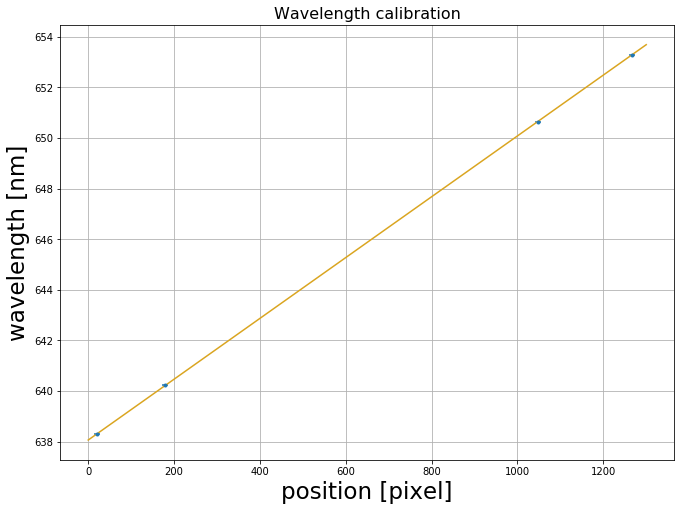

In [43]:
wave = np.array([638.29914,  640.2248,  650.65277, 653.28824])
px = np.array([19.9247575341, 179.791059952, 1046.95468766, 1266.85594725])
px_error = np.array([6.9287462459, 6.85587313646, 6.92038857647, 7.2394220501])

def linear(x, a, b):
    return a*x + b

popt, pcov = curve_fit(linear, px, wave, sigma = px_error)
print('Steigung = ', popt[0], '[nm/px]')
print('Fehler der Steigung = ', np.sqrt(pcov[0][0]), '[nm/px]')

print('Offset = ', popt[1], '[nm/px]')
print('Fehler von Offset = ', np.sqrt(pcov[1][1]), '[nm/px]')

plt.figure(figsize=(11,8))
l = np.linspace(0,1300,10000)
plt.errorbar(px, wave, xerr = px_error, fmt='.', label = 'data')
plt.plot(l, linear(l, *popt), label = 'fit', color = 'goldenrod')
plt.title("Wavelength calibration", size = 16)
plt.xlabel("position [pixel]", size = 23)
plt.ylabel("wavelength [nm]", size = 23)
plt.grid()
#plt.savefig("wavecalib.png")
plt.show()

posn1, intensityn1 = np.loadtxt("./neon1.xls", skiprows = 1, usecols = (0,1), unpack = True)
posn1 = posn1
intensityn1 -= intensityn1[1000]

plt.figure(figsize=(15,7))

plt.plot(posn1, intensityn1, color = 'fuchsia')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Neon1", size = 20)

plt.show()

9436264.0


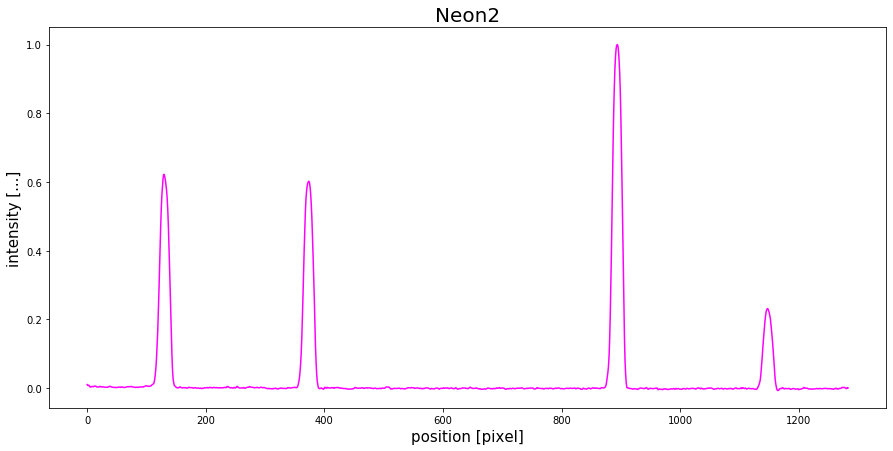

In [44]:
posn2, intensityn2 = np.loadtxt("./neon2.xls", skiprows = 1, usecols = (0,1), unpack = True)
#posn2 = posn2[:1165]
intensityn2 -= intensityn2[600]
print(np.amax(intensityn2[~np.isnan(intensityn2)]))
intensityn2 = intensityn2/np.amax(intensityn2[~np.isnan(intensityn2)])
#intensityn2 = intensityn2[:1165]

plt.figure(figsize=(15,7))

plt.plot(posn2, intensityn2, color = 'fuchsia')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Neon2", size = 20)

plt.show()

11020843.0


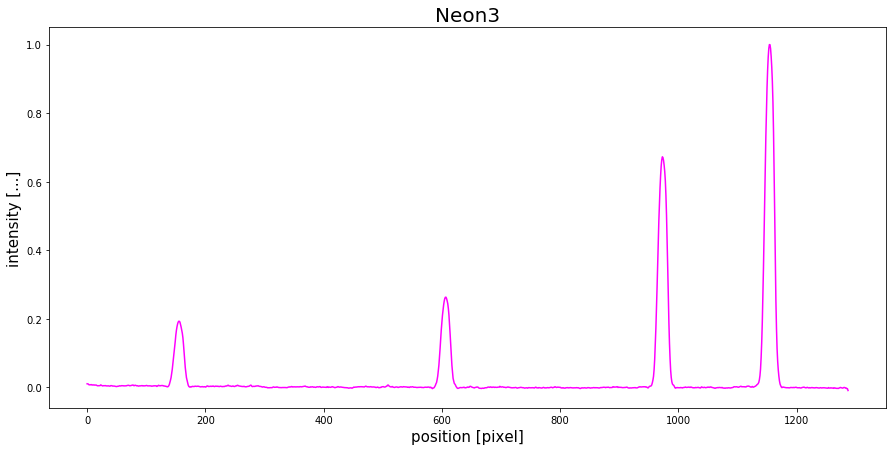

In [45]:
posn3, intensityn3 = np.loadtxt("./neon3.xls", skiprows = 1, usecols = (0,1), unpack = True)
#posn3 = posn3[173:]
intensityn3 -= intensityn3[800]
#intensityn3 = intensityn3[173:]
print(np.amax(intensityn3[~np.isnan(intensityn3)]))
intensityn3 = intensityn3/np.amax(intensityn3[~np.isnan(intensityn3)])


plt.figure(figsize=(15,7))

plt.plot(posn3, intensityn3, color = 'fuchsia')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Neon3", size = 20)

plt.show()

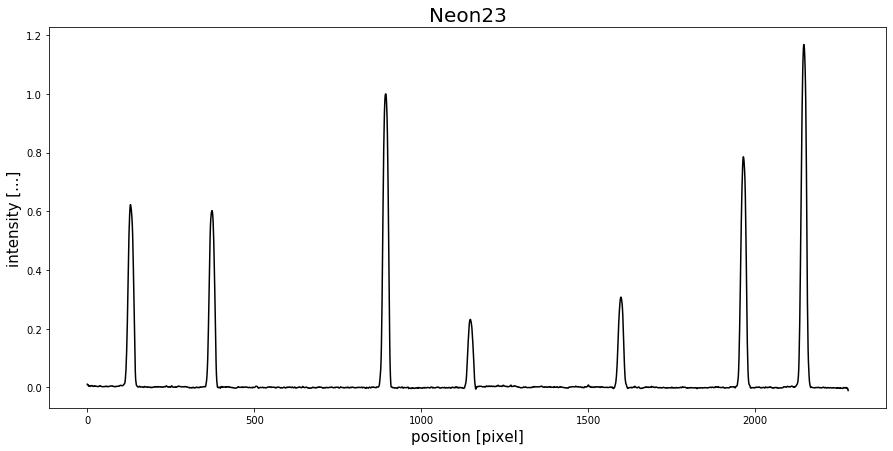

In [46]:
pos23 = np.arange(0, posn2[1165] + len(posn3[173:-1]) + 1)
intensity23 = np.append(intensityn2[:1165], intensityn3[173:]*1.1679)

#pos23 = pos23[2165:]
#intensity23 = intensity23[2165:]

plt.figure(figsize=(15,7))

plt.plot(pos23, intensity23, color = 'black')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Neon23", size = 20)

plt.show()

16391766.3125


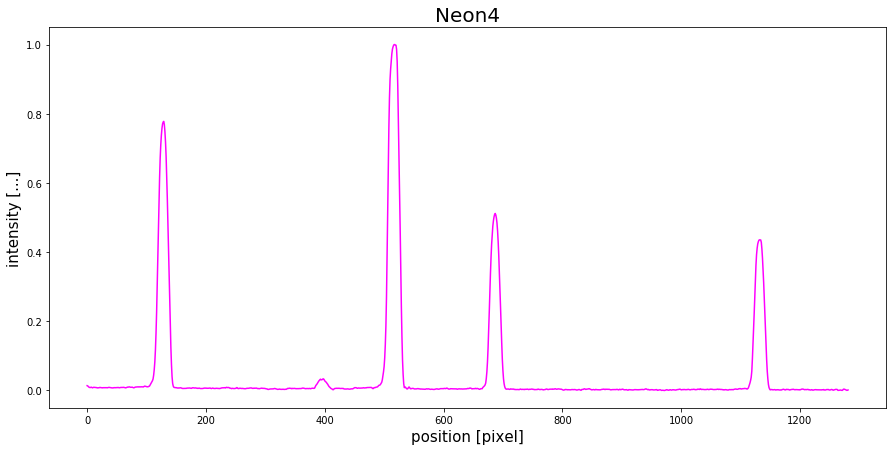

In [47]:
posn4, intensityn4 = np.loadtxt("./neon4.xls", skiprows = 1, usecols = (0,1), unpack = True)
posn4 = posn4
intensityn4 -= intensityn4[800]
print(np.amax(intensityn4[~np.isnan(intensityn4)]))
intensityn4 = intensityn4/np.amax(intensityn4[~np.isnan(intensityn4)])

#posn4 = posn4[145:]
#intensityn4 = intensityn4[145:]

plt.figure(figsize=(15,7))

plt.plot(posn4, intensityn4, color = 'fuchsia')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Neon4", size = 20)

plt.show()

Text(0.5, 1.0, 'Neon234')

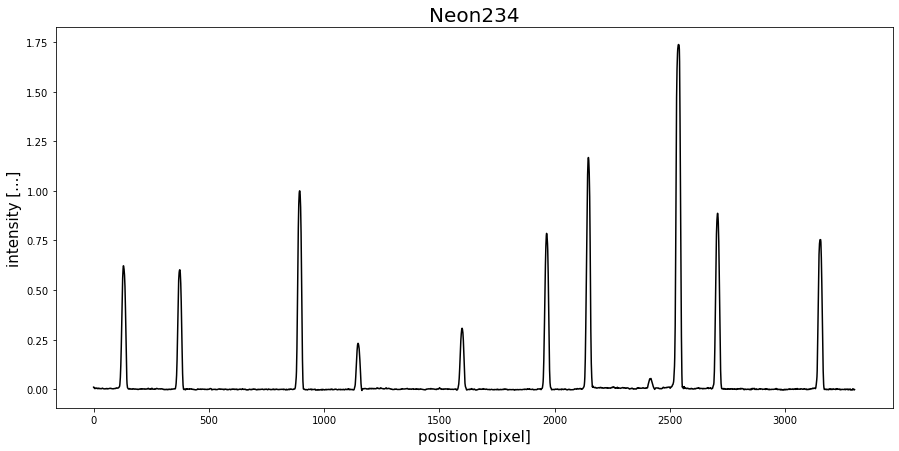

In [48]:
pos234 = np.arange(0, pos23[2165] + len(posn4[145:-1]) + 1)
intensity234 = np.append(intensity23[:2165], intensityn4[145:]*1.7371)

#pos234 = pos234[3170:]
#intensity234 = intensity234[3170:]

plt.figure(figsize=(15,7))

plt.plot(pos234, intensity234, color = 'black')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Neon234", size = 20)

#plt.show()

12741182.5


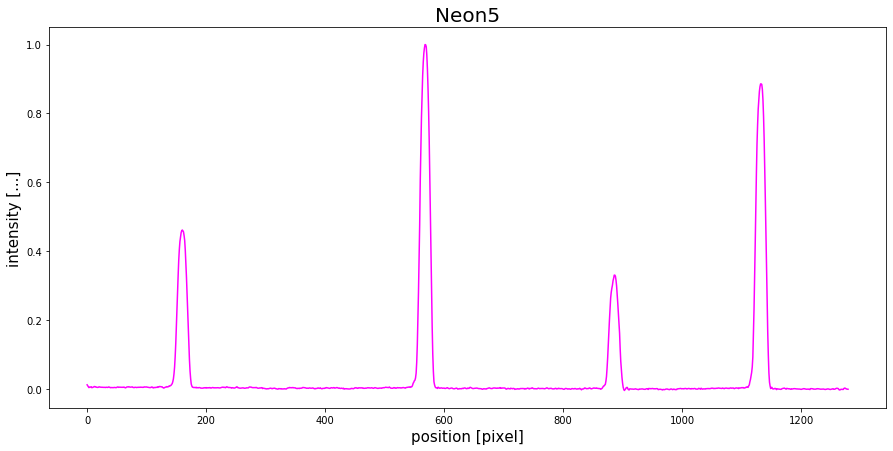

In [49]:
posn5, intensityn5 = np.loadtxt("./neon5.xls", skiprows = 1, usecols = (0,1), unpack = True)
posn5 = posn5
intensityn5 -= intensityn5[800]
print(np.amax(intensityn5[~np.isnan(intensityn5)]))
intensityn5 = intensityn5/np.amax(intensityn5[~np.isnan(intensityn5)])

#posn5 = posn5[175:]
#intensityn5 = intensityn5[175:]

plt.figure(figsize=(15,7))

plt.plot(posn5, intensityn5, color = 'fuchsia')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Neon5", size = 20)

plt.show()

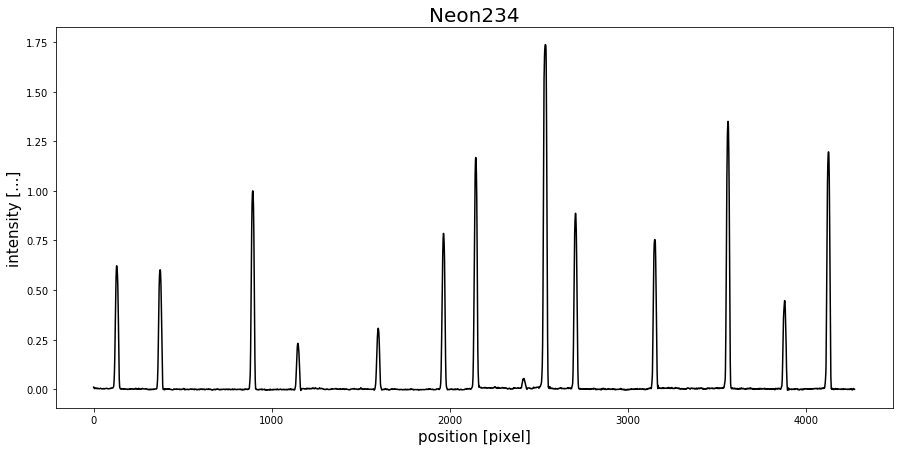

In [50]:
pos2345 = np.arange(0, pos234[3170] + len(posn5[175:-1]) + 1)
intensity2345 = np.append(intensity234[:3170], intensityn5[175:]*1.3502)

#pos2345 = pos2345[4150:]
#intensity2345 = intensity2345[4150:]

plt.figure(figsize=(15,7))

plt.plot(pos2345, intensity2345, color = 'black')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Neon234", size = 20)

plt.show()

16369734.421875


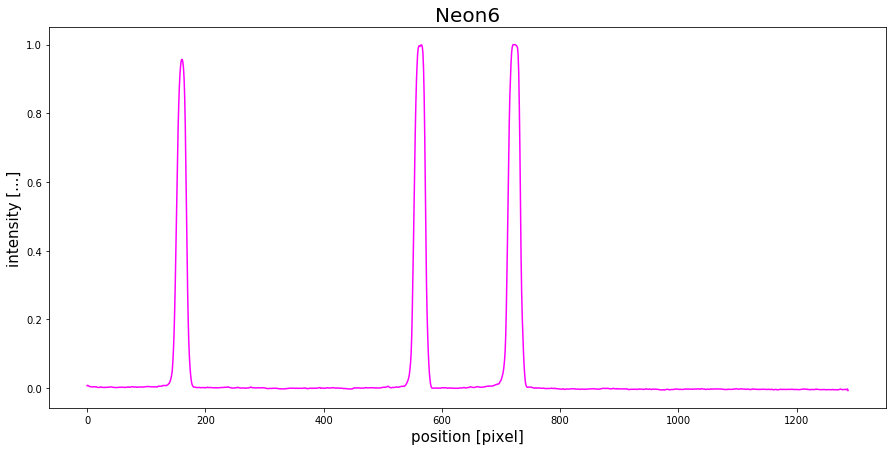

In [51]:
posn6, intensityn6 = np.loadtxt("./neon6.xls", skiprows = 1, usecols = (0,1), unpack = True)
posn6 = posn6
intensityn6 -= intensityn6[400]
print(np.amax(intensityn6[~np.isnan(intensityn6)]))
intensityn6 = intensityn6/np.amax(intensityn6[~np.isnan(intensityn6)])

#posn6 = posn6[180:]
#intensityn6 = intensityn6[180:]

plt.figure(figsize=(15,7))

plt.plot(posn6, intensityn6, color = 'fuchsia')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Neon6", size = 20)

plt.show()

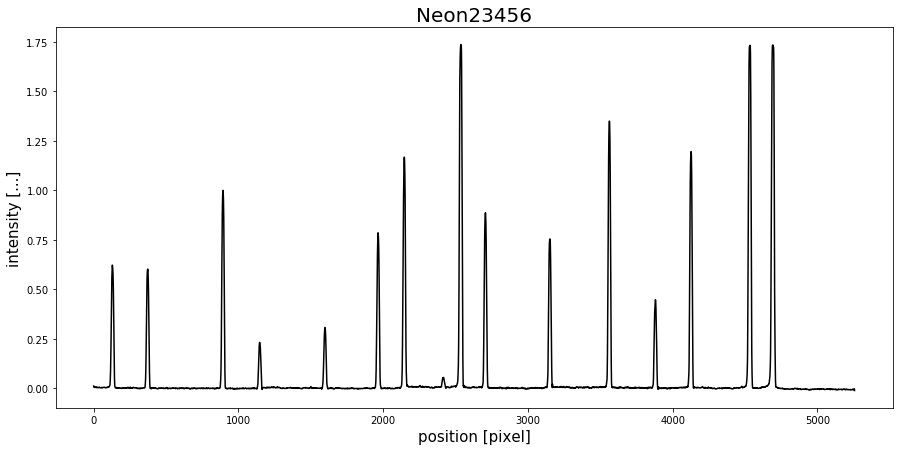

In [52]:
pos23456 = np.arange(0, pos2345[4150] + len(posn6[180:-1]) + 1)
intensity23456 = np.append(intensity2345[:4150], intensityn6[180:]*1.73477)

#pos23456 = pos23456[4725:]
#intensity23456 = intensity23456[4725:]

plt.figure(figsize=(15,7))

plt.plot(pos23456, intensity23456, color = 'black')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Neon23456", size = 20)

plt.show()

16454940.171875


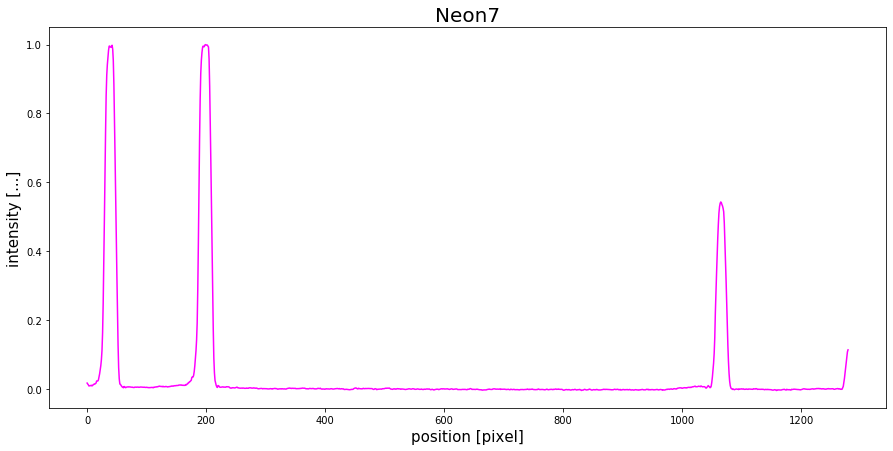

In [53]:
posn7, intensityn7 = np.loadtxt("./neon7.xls", skiprows = 1, usecols = (0,1), unpack = True)
intensityn7 -= intensityn7[400]
print(np.amax(intensityn7[~np.isnan(intensityn7)]))
intensityn7 = intensityn7/np.amax(intensityn7[~np.isnan(intensityn7)])

#posn7 = posn7[220:]
#intensityn7 = intensityn7[220:]

plt.figure(figsize=(15,7))

plt.plot(posn7, intensityn7, color = 'fuchsia')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Neon7", size = 20)

plt.show()

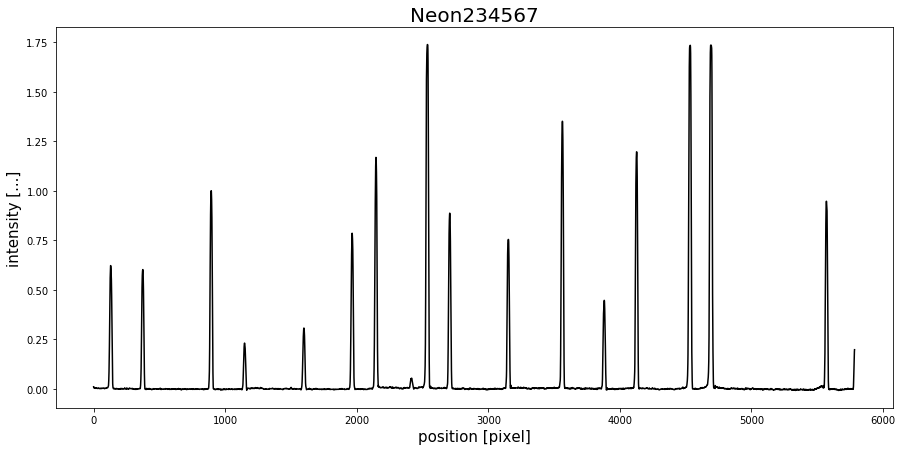

In [54]:
pos234567 = np.arange(0, pos23456[4725] + len(posn7[220:-1]) + 1)
intensity234567 = np.append(intensity23456[:4725], intensityn7[220:]*1.743798)

#pos234567 = pos234567[5600:]
#intensity234567 = intensity234567[5600:]

plt.figure(figsize=(15,7))

plt.plot(pos234567, intensity234567, color = 'black')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Neon234567", size = 20)


plt.show()

8815430.0


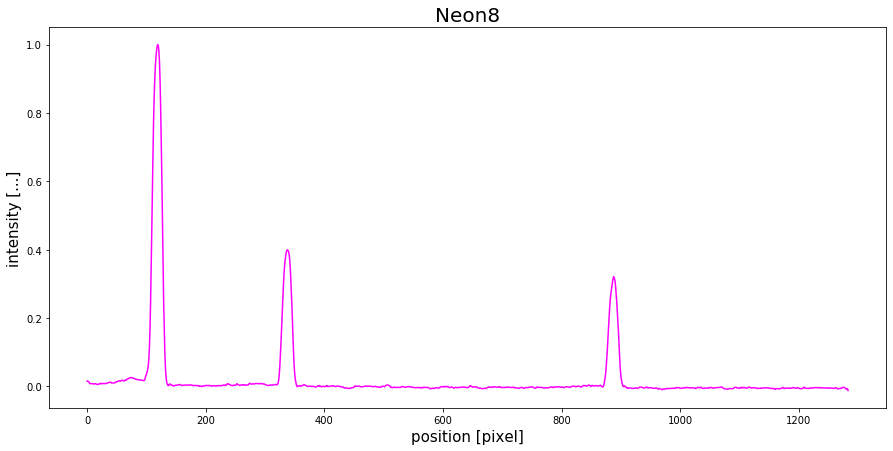

In [55]:
posn8, intensityn8 = np.loadtxt("./neon8.xls", skiprows = 1, usecols = (0,1), unpack = True)
intensityn8 -= intensityn8[500]
print(np.amax(intensityn8[~np.isnan(intensityn8)]))
intensityn8 = intensityn8/np.amax(intensityn8[~np.isnan(intensityn8)])

#posn8 = posn8[140:]
#intensityn8 = intensityn8[140:]

plt.figure(figsize=(15,7))

plt.plot(posn8, intensityn8, color = 'fuchsia')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Neon8", size = 20)

plt.show()

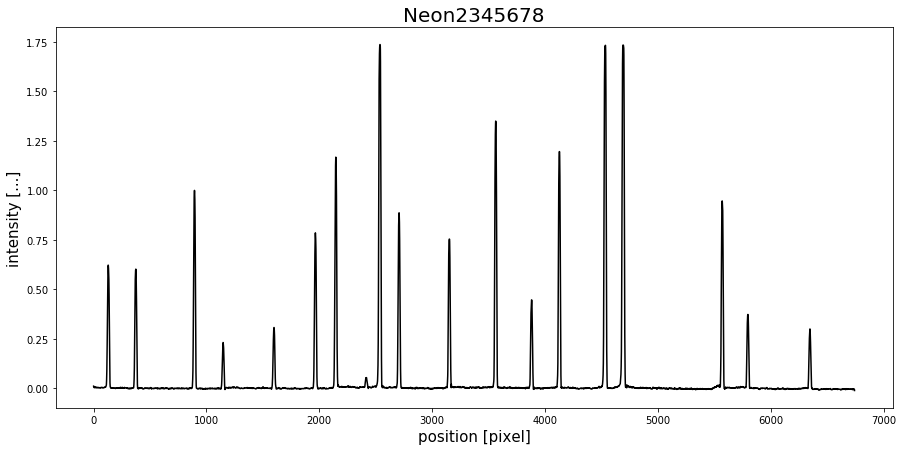

In [56]:
pos2345678 = np.arange(0, pos234567[5600] + len(posn8[140:-1]) + 1)
intensity2345678 = np.append(intensity234567[:5600], intensityn8[140:]*0.93421)

#pos2345678 = pos2345678[6370:]
#intensity2345678 = intensity2345678[6370:]

plt.figure(figsize=(15,7))

plt.plot(pos2345678, intensity2345678, color = 'black')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Neon2345678", size = 20)

plt.show()

3320744.0


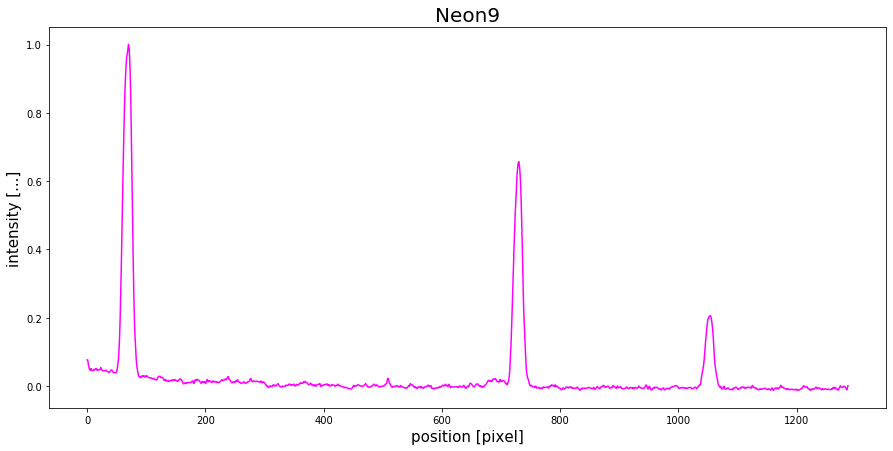

In [57]:
posn9, intensityn9 = np.loadtxt("./neon9.xls", skiprows = 1, usecols = (0,1), unpack = True)
intensityn9 -= intensityn9[500]
print(np.amax(intensityn9[~np.isnan(intensityn9)]))
intensityn9 = intensityn9/np.amax(intensityn9[~np.isnan(intensityn9)])

#posn9 = posn9[90:]
#intensityn9 = intensityn9[90:]

plt.figure(figsize=(15,7))

plt.plot(posn9, intensityn9, color = 'fuchsia')
plt.xlabel("position [pixel]", size = 15)
plt.ylabel("intensity [...]", size = 15)
plt.title("Neon9", size = 20)

plt.show()

## This is all normalized with respect to the highest line in the first spectrum

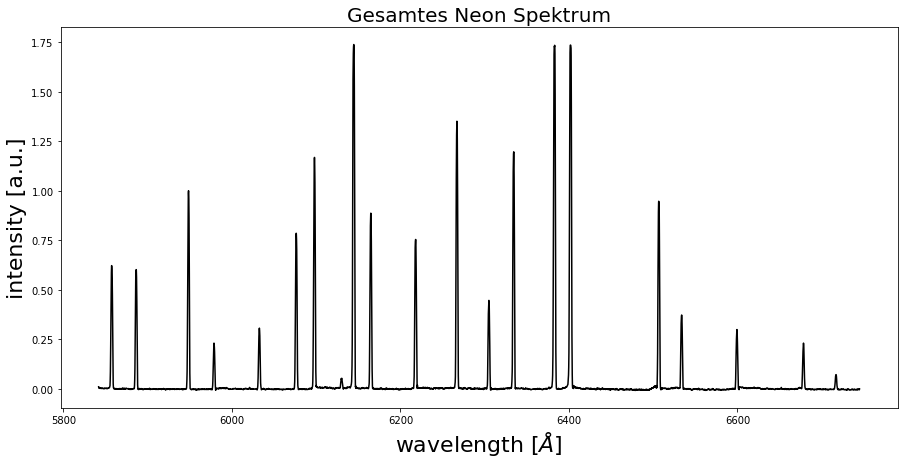

In [58]:
pos23456789 = np.arange(0, pos2345678[6370] + len(posn9[90:-1]) + 1)
intensity23456789 = np.append(intensity2345678[:6370], intensityn9[90:]*0.35191)

#pos2345678 = pos2345678[5560:]
#intensity2345678 = intensity2345678[5560:]

plt.figure(figsize=(15,7))
axis = 0.0119348127601*pos23456789 + 584.176092926
plt.plot(10*axis, intensity23456789, color = 'black')
plt.xlabel("wavelength [$\AA$]", size = 22)
plt.ylabel("intensity [a.u.]", size = 22)
plt.title("Gesamtes Neon Spektrum", size = 20)
#plt.savefig("neon.png")

plt.show()

Steigung =  0.01193481276005545 [nm/px]
Fehler der Steigung =  inf [nm/px]
Offset =  584.1760929264912 [nm/px]
Fehler von Offset =  inf [nm/px]


/Users/iuliiaskobleva/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:799: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


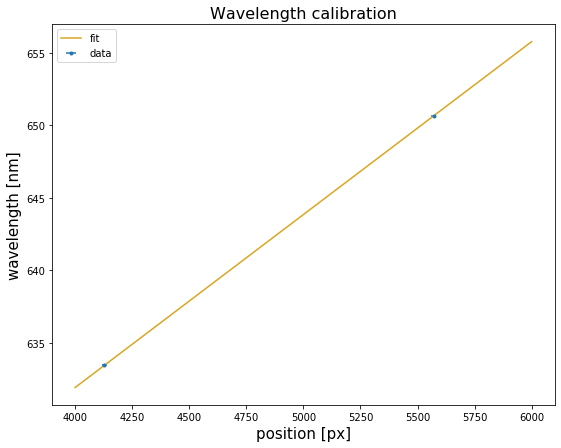

In [59]:
wave = np.array([650.653, 633.443])
px = np.array([5570.0, 4128])
px_error = np.array([10, 10])

def linear(x, a, b):
    return a*x + b

popt, pcov = curve_fit(linear, px, wave, sigma = px_error)
print('Steigung = ', popt[0], '[nm/px]')
print('Fehler der Steigung = ', np.sqrt(pcov[0][0]), '[nm/px]')

print('Offset = ', popt[1], '[nm/px]')
print('Fehler von Offset = ', np.sqrt(pcov[1][1]), '[nm/px]')

plt.figure(figsize=(9,7))
l = np.linspace(4000,6000,10000)
plt.errorbar(px, wave, xerr = px_error, fmt='.', label = 'data')
plt.plot(l, linear(l, *popt), label = 'fit', color = 'goldenrod')
plt.title("Wavelength calibration", size = 16)
plt.xlabel("position [px]", size = 15)
plt.ylabel("wavelength [nm]", size = 15)
plt.legend(loc = 'best')
#plt.savefig("wavecalib.png")
plt.show()